In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Documentation

Online documentation is available at [seaborn.pydata.org](https://seaborn.pydata.org).

The docs include a [tutorial](https://seaborn.pydata.org/tutorial.html), [example gallery](https://seaborn.pydata.org/examples/index.html), [API reference](https://seaborn.pydata.org/api.html), [FAQ](https://seaborn.pydata.org/faq.html) and other useful information.

# Plots

## Relational plots

- [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot): Draw a line plot with the possibility of several semantic groupings.

- [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot): Figure-level interface for drawing relational plots onto a FacetGrid.

- [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot): Draw a scatter plot with the possibility of several semantic groupings.

### Seaborn theme styles: 
- There are [five preset seaborn themes](https://seaborn.pydata.org/tutorial/aesthetics.html): darkgrid, whitegrid, dark, white, and ticks. 

### Seaborn built-in datasets:
- Seaborn's [22 built-in datasets](https://www.kaggle.com/datasets/abdoomoh/all-seaborn-built-in-datasets) are essential resources for anyone interested in practicing data analysis, visualization, and machine learning. 

### Seaborn color palettes:
- [Using Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

### Lineplot from a wide-form dataset (lineplot)

A         B         C         D
2016-01-01  0.167921  0.523505  0.817376  1.703846
2016-01-02 -1.979026  1.237704  0.057230  2.743267
2016-01-03 -2.945478  1.094025  1.628355  2.359988
2016-01-04 -2.307479  0.749367  1.624072  2.518347
2016-01-05 -3.270573  0.333310  1.867085  2.866550

<Axes: >

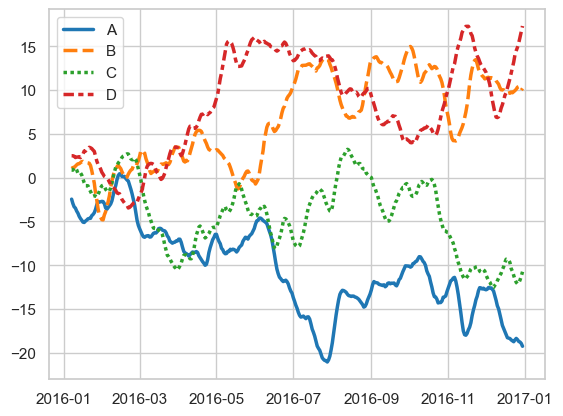

In [7]:
# Set the theme to 'whitegrid' 
sns.set_theme(style="whitegrid")

# Initialize a random number generator with a fixed seed for reproducibility
rs = np.random.RandomState(365)

# Generate a 365-day time series with 4 random variables, applying cumulative sum
values = rs.randn(365, 4).cumsum(axis=0)

# Create a date range for the year 2016
dates = pd.date_range("1 1 2016", periods=365, freq="D")

# Construct a DataFrame with generated values and date index
data = pd.DataFrame(values, index=dates, columns=["A", "B", "C", "D"])

# Display the first 5 rows of the dataset
display(data.head())

# Apply a 7-day rolling average to smooth the data
data = data.rolling(7).mean()

# Create a line plot for the smoothed data
sns.lineplot(
    data=data,          # Use the prepared DataFrame
    palette="tab10",    # Use a vibrant color palette
    linewidth=2.5       # Increase line thickness for better visibility
)

### Timeseries plot with error bands (lineplot)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

<Axes: xlabel='timepoint', ylabel='signal'>

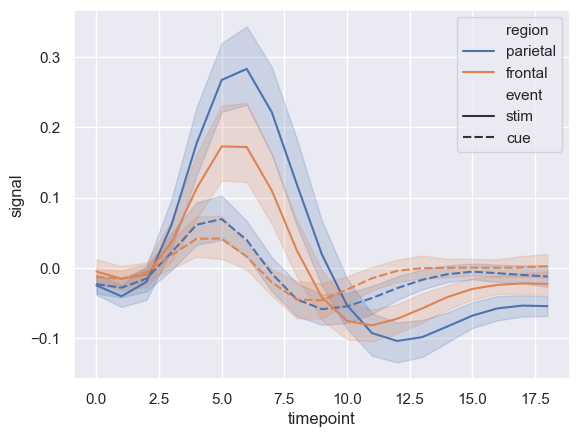

In [9]:
# Set the visual theme to 'darkgrid'
sns.set_theme(style="darkgrid")

# Load the example 'fmri' (functional magnetic resonance imaging) dataset 
fmri = sns.load_dataset("fmri")

# Display the first 5 rows of the dataset
display(fmri.head())

# Create a line plot showing signal response over time for different brain regions and events
sns.lineplot(
    data=fmri,
    x="timepoint",                 # X-axis: time point of the signal measurement
    y="signal",                    # Y-axis: signal strength
    hue="region",                  # Line color indicates brain region
    style="event",                 # Line style (solid/dashed) based on event type ('stim' or 'cue')
    markers=False,                 # No markers on individual points
    errorbar="ci"                  # Show confidence intervals around the mean line (default: 95% CI)
)

### Line plots on multiple facets (relplot)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

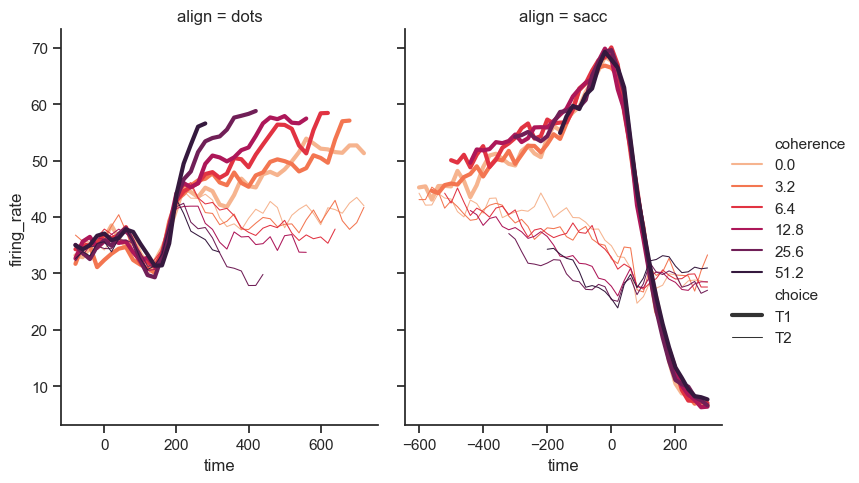

In [11]:
# Set the visual theme to 'ticks'
sns.set_theme(style="ticks")

# Load the example 'dots' dataset 
dots = sns.load_dataset("dots")

# Display first 5 rows of the dataset
display(dots.head())

# Define a custom reversed color palette using Seaborn's "rocket" palette
palette = sns.color_palette("rocket_r")

# Create a faceted line plot
sns.relplot(
    data=dots,
    x="time", y="firing_rate",       # Plot firing rate over time
    hue="coherence",                 # Line color represents coherence level
    size="choice",                   # Line thickness represents choice (T1 or T2)
    size_order=["T1", "T2"],         # Force a consistent order for line thickness by choice
    kind="line",                     # Specifies line plot (vs scatter)
    col="align",                     # Create separate plots (facets) for each alignment condition
    palette=palette,                 # Apply the custom reversed color palette
    height=5, aspect=.75,            # Set plot height and aspect ratio
    facet_kws=dict(sharex=False),    # Do not force shared x-axes across facets (preserve individual time ranges)
)

### Scatterplot with multiple semantics

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<Axes: xlabel='carat', ylabel='price'>

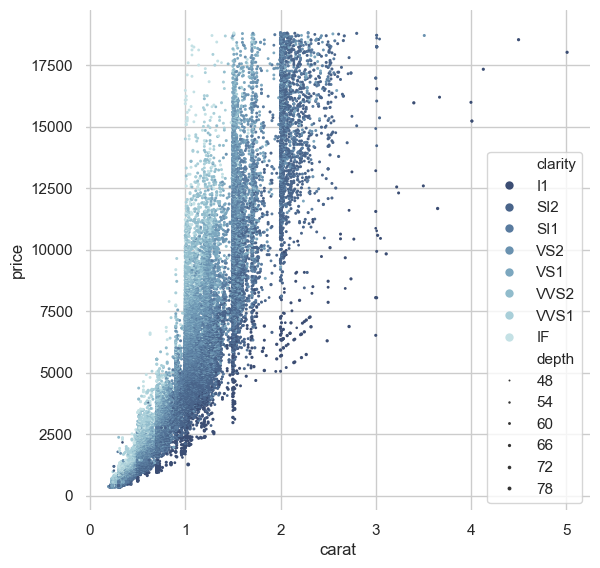

In [13]:
# Set the visual theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Load the example 'diamonds' dataset
diamonds = sns.load_dataset("diamonds")

# Display first 5 rows of the dataset
display(diamonds.head())

# Create a square figure and axis object with a custom size
fig, ax = plt.subplots(figsize=(6.5, 6.5))

# Remove the left and bottom spines for a cleaner, modern look
sns.despine(fig, ax, left=True, bottom=True)

# Define a logical clarity ranking from worst (I1) to best (IF)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Create a scatter plot showing carat vs. price, colored and sized by clarity and depth
sns.scatterplot(
    data=diamonds,
    x="carat",                  # X-axis: diamond weight (carat)
    y="price",                  # Y-axis: diamond price (USD)
    hue="clarity",              # Color represents clarity group
    hue_order=clarity_ranking,  # Enforce clarity order (low to high)
    size="depth",               # Size of dots based on diamond depth
    sizes=(1, 8),               # Size range for scaling depth
    palette="ch:rot=-.2,dark=.3_r",  # Chroma-based color palette, reversed
    ax=ax,
    linewidth=0                 # No border around points for a flat aesthetic
)

### Scatterplot heatmap (relplot)

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

level_0 level_1  correlation
0  1-1-lh  1-1-lh     1.000000
1  1-1-lh  1-1-rh     0.881516
2  1-1-lh  3-1-lh    -0.342849
3  1-1-lh  3-1-rh    -0.169498
4  1-1-lh  4-1-lh    -0.373050

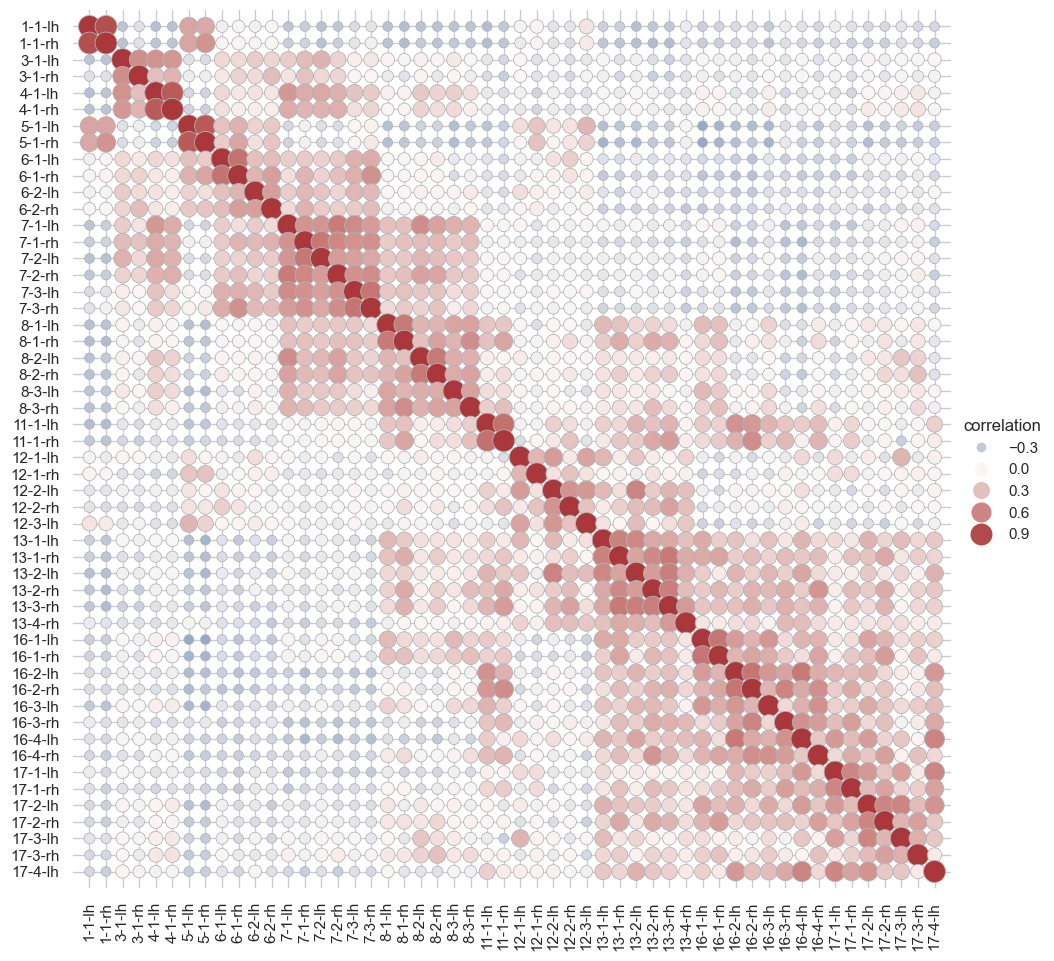

In [15]:
# Set the visual theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Load the example 'brain_networks' dataset with multi-indexed columns
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Display the first 5 rows
display(df.head())

# Define a list of network IDs we want to include in the analysis
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]

# Select columns where the 'network' level matches the desired networks
used_columns = (
    df.columns.get_level_values("network")
      .astype(int)
      .isin(used_networks)
)
df = df.loc[:, used_columns]  # Keep only the relevant columns

# Flatten the multi-index column headers into strings for easier plotting
df.columns = df.columns.map("-".join)

# Compute the correlation matrix between all selected columns
# Stack the matrix and convert it into a long-form DataFrame
corr_mat = df.corr().stack().reset_index(name="correlation")

# Display the first 5 rows of the dataset
display(corr_mat.head())

# Create a scatterplot matrix using point color and size to show correlation values
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1",           # Correlation pairs as X and Y axes
    hue="correlation",                  # Color reflects correlation strength
    hue_norm=(-1, 1),                   # Normalize hue to cover full correlation range
    size="correlation",                 # Size also reflects correlation strength
    sizes=(50, 250),                    # Min and max point sizes
    size_norm=(-0.2, 0.8),              # Normalize size mapping to highlight mid-range
    palette="vlag",                     # Blue-to-red diverging color palette
    height=10,                          # Overall figure height
    edgecolor=".7",                     # Light gray edges around the points
)

# Final visual adjustments for better appearance
g.set(xlabel="", ylabel="", aspect="equal")  # Clean axis labels and square shape
g.despine(left=True, bottom=True)            # Remove borders for minimal design
g.ax.margins(.02)                            # Slight margin around the plot

# Rotate X-axis labels for readability
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

### Scatterplot with continuous hues and sizes (relplot)

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

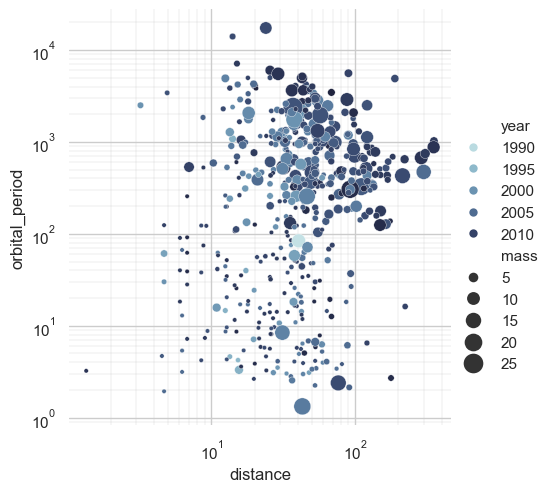

In [17]:
# Set the visual theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Load the built-in 'planets' dataset
planets = sns.load_dataset("planets")

# Display the first 5 rows of the dataset
display(planets.head())

# Create a cubehelix colormap to apply to the 'year' variable for color coding
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Create a scatter plot to visualize the relationship between distance and orbital period
g = sns.relplot(
    data=planets,               # Dataset containing planets data
    x="distance",                # Distance of the planets from the star
    y="orbital_period",          # Orbital period of the planets
    hue="year",                  # Color points based on the year of discovery
    sizes=(10, 200),             # Size range for the points
    size="mass",                 # Size of the points proportional to the planet's mass
    palette=cmap                # Use the custom cubehelix colormap for the hue
)

# Set both x and y axes to log scale for better visualization of large ranges
g.set(xscale="log", yscale="log")

# Add minor gridlines to the x and y axes for more detailed reference
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

# Remove the left and bottom spines for a cleaner plot
g.despine(left=True, bottom=True)

### Scatterplot with varying point sizes and hues (relplot)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

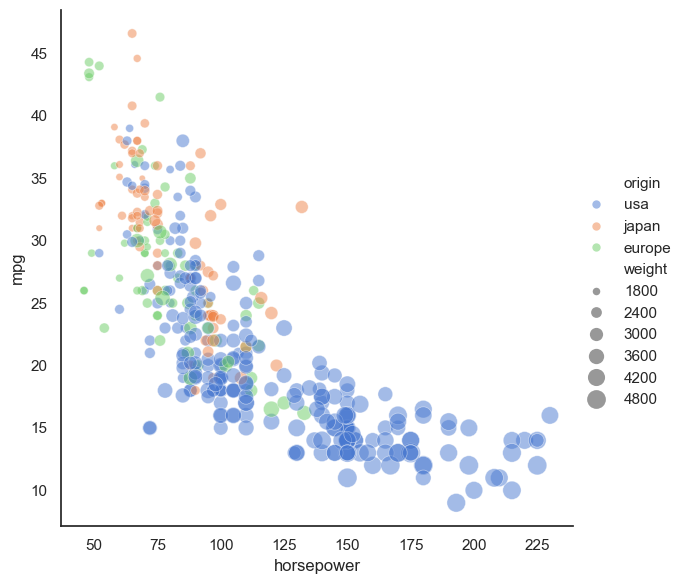

In [19]:
# Set the visual theme to 'white'
sns.set_theme(style="white")

# Load the built-in 'mpg' dataset
mpg = sns.load_dataset("mpg")

# Display the first 5 rows of the dataset
display(mpg.head())

# Create a scatter plot showing the relationship between horsepower and MPG
sns.relplot(
    data=mpg,          # Use the 'mpg' dataset
    x="horsepower",    # Horsepower on the x-axis
    y="mpg",           # Miles per gallon (fuel efficiency) on the y-axis
    hue="origin",      # Color points based on car origin (USA, Europe, Japan)
    size="weight",     # Adjust point size based on car weight
    sizes=(20, 200),   # Define minimum and maximum point sizes
    alpha=.5,          # Set transparency for better visibility of overlapping points
    palette="muted",   # Use a soft color palette
    height=6,          # Set the height of the plot
)

### Small multiple time series (relplot)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

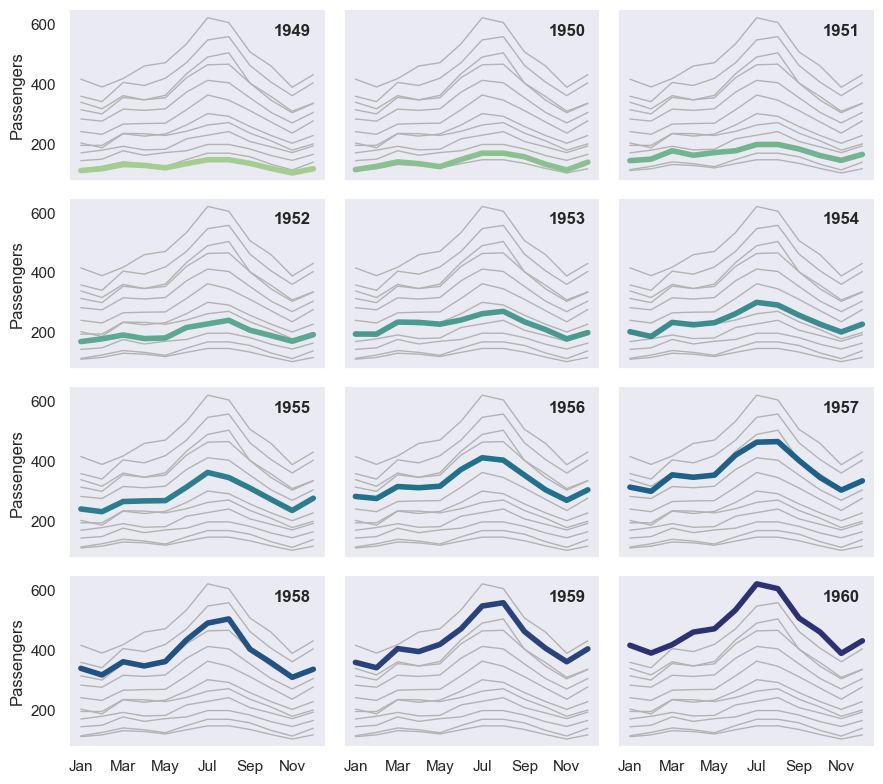

In [21]:
# Set the visual theme to 'dark' 
sns.set_theme(style="dark")

# Load the built-in 'flights' dataset
flights = sns.load_dataset("flights")

# Display the first 5 rows of the dataset
display(flights.head())

# Create a faceted line plot, displaying each year's time series separately
g = sns.relplot(
    data=flights,          # Use the 'flights' dataset
    x="month",             # Month on the x-axis
    y="passengers",        # Number of passengers on the y-axis
    hue="year",            # Color lines by year
    col="year",            # Separate plots by year
    col_wrap=3,            # Arrange plots in a 3-column grid
    kind="line",           # Use a line plot
    palette="crest",       # Use a cool color palette
    linewidth=4,           # Set line thickness
    zorder=5,              # Ensure lines appear above grid elements
    height=2,              # Set height of each subplot
    aspect=1.5,            # Adjust aspect ratio for readability
    legend=False,          # Hide the legend to reduce clutter
)

# Iterate over each subplot to add annotations and background context
for year, ax in g.axes_dict.items():

    # Add the year as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Overlay all yearly trends in the background for reference
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of x-axis ticks for better readability
ax.set_xticks(ax.get_xticks()[::2])

# Customize plot labels and layout
g.set_titles("")          # Remove individual subplot titles
g.set_axis_labels("", "Passengers")  # Keep only y-axis label
g.tight_layout()          # Optimize spacing between subplots

## Distribution plots

- [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot): Figure-level interface for drawing distribution plots onto a FacetGrid.

- [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot): Plot univariate or bivariate histograms to show distributions of datasets.

- [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot): Plot univariate or bivariate distributions using kernel density estimation.

- [`ecdfplot`](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot): Plot empirical cumulative distribution functions.

- [`rugplot`](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot): Plot marginal distributions by drawing ticks along the x and y axes.

### Facetting histograms by subsets of data (displot, histplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

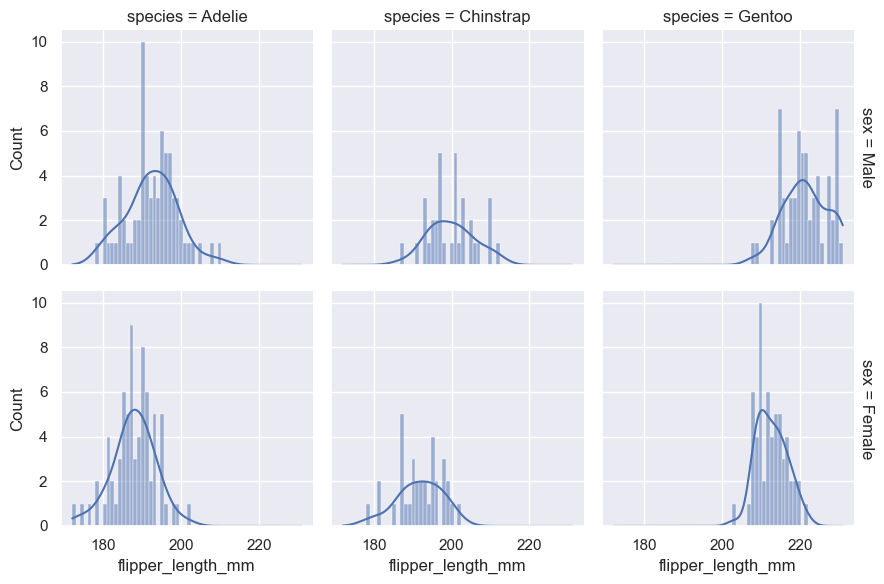

In [24]:
# Set the visual theme to 'darkgrid'
sns.set_theme(style="darkgrid")

# Load the example 'penguins' dataset
df = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(df.head())

# Create a faceted histogram with KDE (smoothed density curve) for flipper lengths
sns.displot(
    df,
    x="flipper_length_mm",         # Variable to plot on the x-axis
    col="species",                 # Separate plots by penguin species (Adelie, Chinstrap, Gentoo)
    row="sex",                     # Further divide plots by sex (Male/Female)
    bins = 60,                     # Set a total number of bins 
    # binwidth=3,                  # Width of each histogram bin in mm
    height=3,                      # Height of each facet (in inches)
    kde=True,                      # Overlay a KDE (kernel density estimate) curve on the histogram
    facet_kws=dict(margin_titles=True)  # Show titles in the margins for a cleaner layout
)

### Conditional kernel density estimate (displot, kdeplot)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

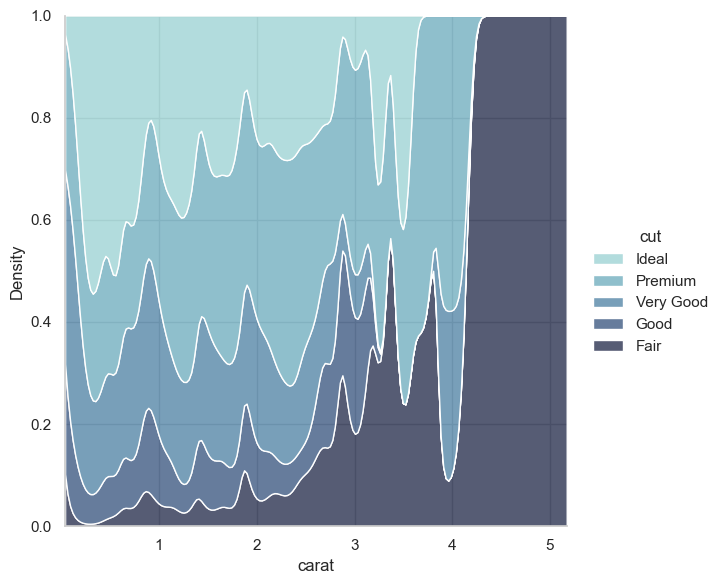

In [26]:
# Set the theme to 'whitegrid' 
sns.set_theme(style="whitegrid")

# Load the example 'diamonds' dataset
diamonds = sns.load_dataset("diamonds")

# Display the first 5 rows of the dataset
display(diamonds.head())

# Create a kernel density plot of carat, colored by cut
sns.displot(
    data=diamonds,
    x="carat",                        # Variable to plot on the X-axis
    hue="cut",                        # Group and color the lines by cut quality
    kind="kde",                       # Use kernel density estimation for smooth curves. kind{“hist”, “kde”, “ecdf”}
    height=6,                         # Height of the figure in inches
    multiple="fill",                  # Normalize each X-slice to sum to 1 (stacked proportions). multiple{“layer”, “stack”, “fill”}
    clip=(0, None),                   # Do not allow carat values below 0
    palette="ch:rot=-.25, hue=1, light=.75"  # Custom color palette with rotating hue and adjusted lightness
)

### Facetted ECDF plots (displot, ecdfplot)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

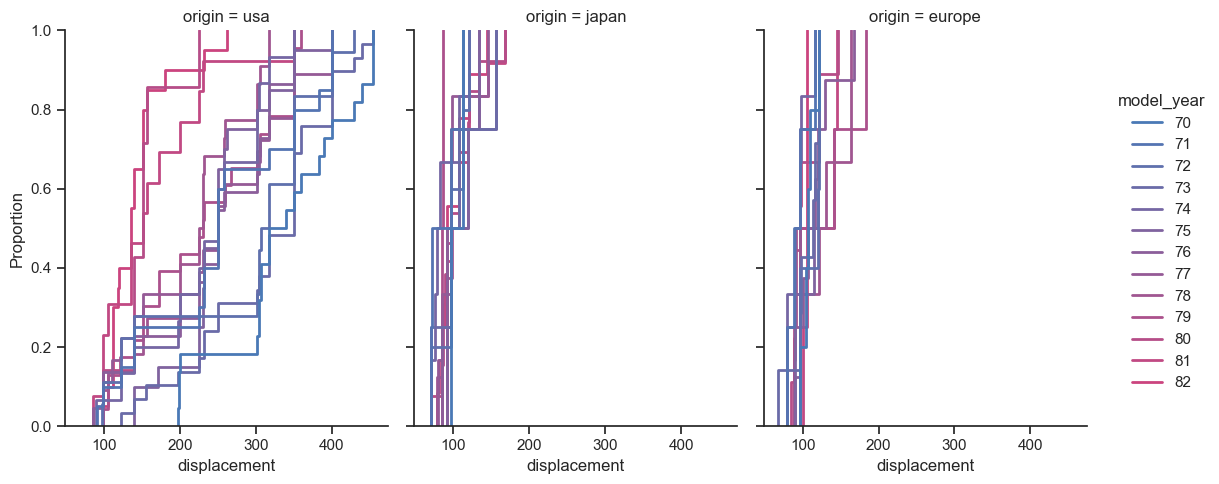

In [28]:
# Set the visual theme to 'ticks'
sns.set_theme(style="ticks")

# Load the built-in 'mpg' dataset (car data with fuel and engine specs)
mpg = sns.load_dataset("mpg")

# Display the first 5 rows of the dataset
display(mpg.head())

# Define two color anchors (in HUSL space) for blending into a continuous color map
colors = (250, 70, 50), (350, 70, 50)

# Create a smooth color map between the two HUSL values
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)

# Plot ECDFs of engine displacement, split by car origin and shaded by model year
sns.displot(
    data=mpg,
    x="displacement",              # X-axis: engine size (liters)
    hue="model_year",              # Use model year to color lines
    col="origin",                  # Create separate subplots for each region (USA, Europe, Japan)
    kind="ecdf",                   # Plot ECDF (Empirical Cumulative Distribution Function)
    aspect=0.75,                   # Adjust subplot aspect ratio
    linewidth=2,                   # Thicker lines for better visibility
    palette=cmap,                  # Apply the smooth blended colormap
)

### Trivariate histogram with two categorical variables (displot)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

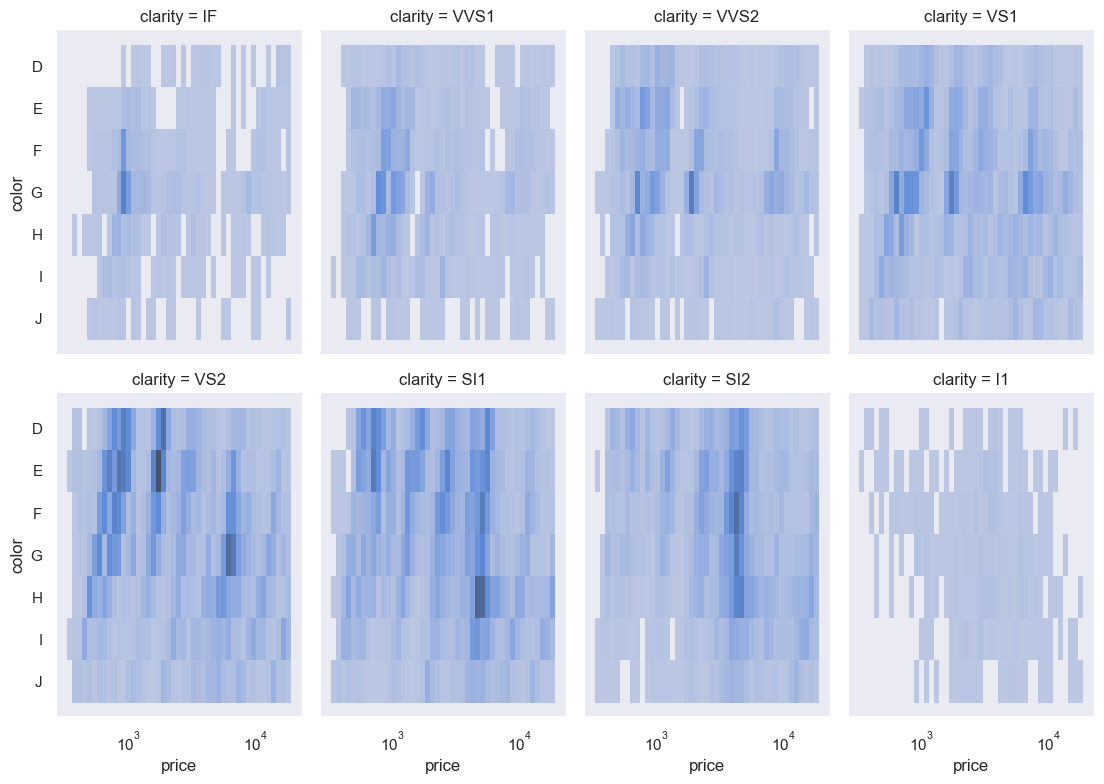

In [30]:
# Set a dark-themed style for the plots
sns.set_theme(style="dark")

# Load the built-in 'diamonds' dataset
diamonds = sns.load_dataset("diamonds")

# Display the first 5 rows of the dataset
display(mpg.head())

# Create a faceted distribution plot
sns.displot(
    data=diamonds,          # Use the 'diamonds' dataset
    x="price",              # X-axis: Price of diamonds
    y="color",              # Y-axis: Color grade of diamonds
    col="clarity",          # Create separate plots for each 'clarity' category
    col_wrap=4,             # Arrange facets into a grid with 4 columns
    log_scale=(True, False),# Log-scale the x-axis (price) for better visualization
    height=4,               # Set height of each subplot
    aspect=.7,              # Set width-to-height ratio
)

### Stacked histogram on a log scale (histplot)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

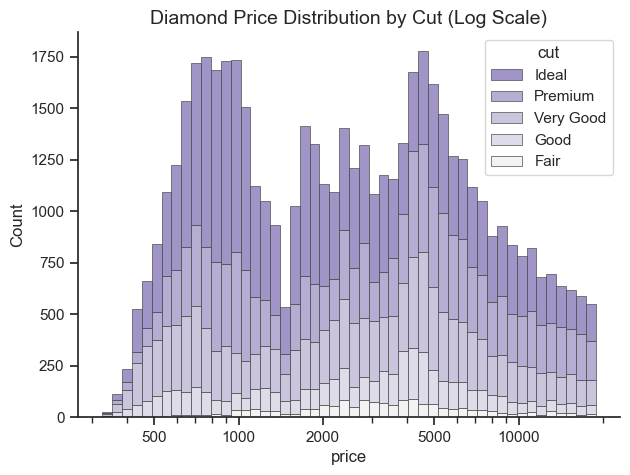

In [32]:
# Set the visual theme to 'ticks'
sns.set_theme(style="ticks")

# Load the example 'diamonds' dataset
diamonds = sns.load_dataset("diamonds")

# Display the first 5 rows of the dataset
display(diamonds.head())

# Create a matplotlib figure and axes with a custom size
fig, ax = plt.subplots(figsize=(7, 5))

# Remove top and right spines from the figure for a cleaner look
sns.despine(fig)

# Create a histogram of diamond prices, colored by cut quality
sns.histplot(
    data=diamonds,
    x="price",                      # X-axis: diamond price
    hue="cut",                      # Group and color bars by cut category
    multiple="stack",               # Stack histograms for each cut group. Options: "dodge", "stack"
    palette="light:m_r",            # Use a light magenta-to-red color palette
    edgecolor=".3",                 # Outline color for each bar (light gray)
    linewidth=0.5,                  # Thin outlines for separation
    log_scale=True,                 # Use log scale for better price spread visualization
    # binwidth=100,                # Set consistent bin widths (e.g. 100)
    bins=50                        # Or set a total number of bins 
)
# Add a title for clarity
ax.set_title("Diamond Price Distribution by Cut (Log Scale)", fontsize=14)

# Format the x-axis to use regular numbers (not scientific notation)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

# Define specific tick locations on the x-axis for clarity
ax.set_xticks([500, 1000, 2000, 5000, 10000])

### Different cubehelix palettes (kdeplot)

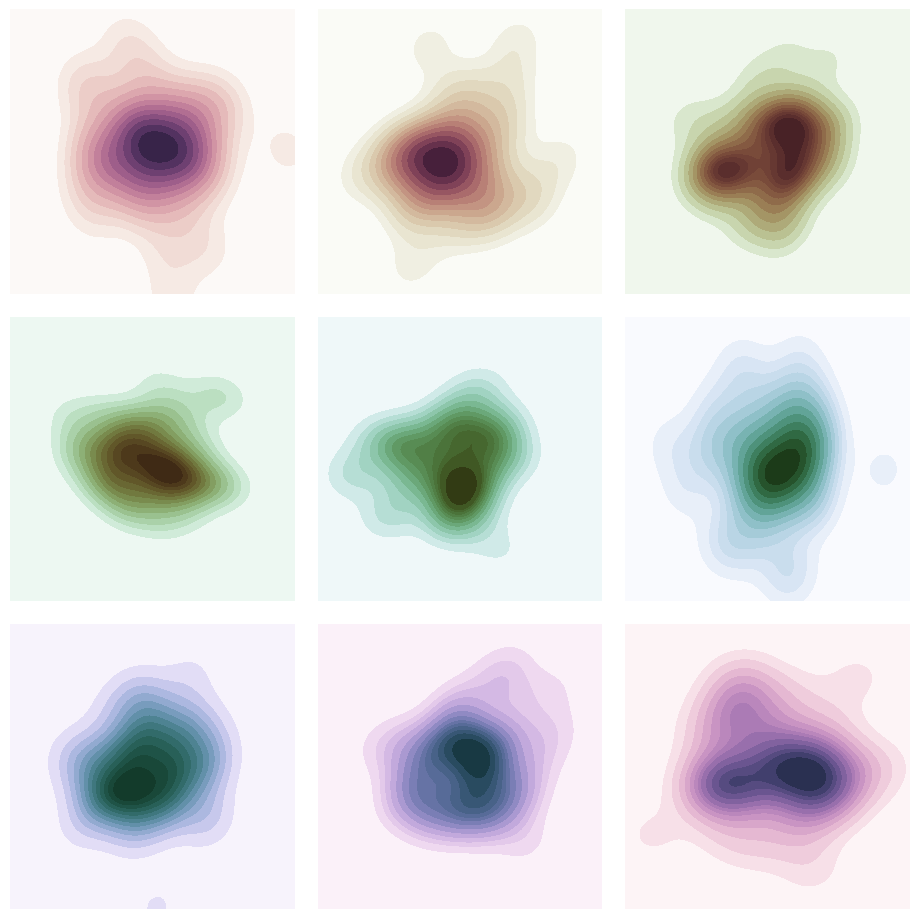

In [34]:
# Set the seaborn theme with a "white" background
sns.set_theme(style="white")

# Create a random number generator with a fixed seed for reproducibility
rs = np.random.RandomState(50)

# Set up a 3x3 grid of subplots with shared x and y axes
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9), sharex=True, sharey=True)

# Iterate over each subplot and assign different color gradients
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap that varies based on 's'
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate a random bivariate dataset (50 points)
    x, y = rs.normal(size=(2, 50))

    # Plot a density plot using kernel density estimation (KDE)
    sns.kdeplot(
        x=x, y=y,                # Input data
        cmap=cmap, fill=True,    # Apply colormap with filled contours
        clip=(-5, 5), cut=10,    # Define bounds for data extension
        thresh=0, levels=15,     # Set contour levels and threshold
        ax=ax,                   # Assign plot to the current subplot
    )

    # Remove axis labels and ticks for a cleaner look
    ax.set_axis_off()

# Set consistent x and y axis limits across all subplots
ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))

# Adjust subplot spacing for a balanced layout
f.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.08, hspace=0.08)

### Bivariate plot with multiple elements (histplot, kdeplot, scatterplot)

<Axes: >

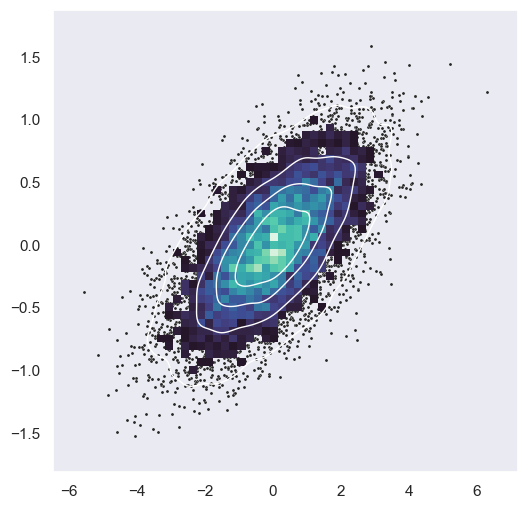

In [36]:
# Set the visual theme to 'dark'
sns.set_theme(style="dark")

# Generate synthetic bivariate data
n = 10000                                   # Number of data points
mean = [0, 0]                               # Mean of the bivariate distribution
cov = [(2, 0.4), (0.4, 0.2)]                # Covariance matrix: X more spread out than Y
rs = np.random.RandomState(0)             # Seeded random generator for reproducibility

# Generate samples from the multivariate normal distribution
x, y = rs.multivariate_normal(mean, cov, n).T

# Set up the plot
f, ax = plt.subplots(figsize=(6, 6))        # Create a square figure

# Plot the raw data as a scatterplot
sns.scatterplot(
    x=x, y=y,                               # Bivariate data
    s=5,                                    # Small dot size for clarity
    color=".15"                             # Dark gray dots (low-contrast background)
)

# Add a 2D histogram heatmap on top of the scatterplot
sns.histplot(
    x=x, y=y,
    bins=50,                                # Resolution of the grid
    pthresh=0.1,                            # Only show cells with a count density above 10%
    cmap="mako"                             # Color map for density — deep ocean blues
)

# Overlay white density contour lines
sns.kdeplot(
    x=x, y=y,
    levels=5,                               # Number of contour lines
    color="w",                              # White lines for contrast
    linewidths=1                            # Line thickness
)

### Multiple bivariate KDE plots (kdeplot)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

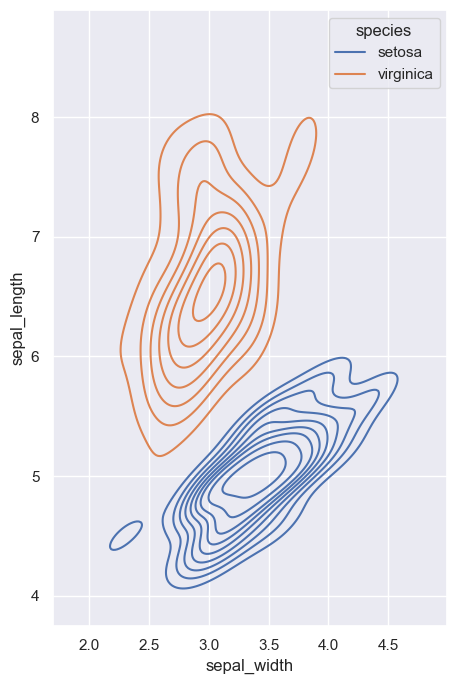

In [38]:
# Set the visual theme to 'darkgrid'
sns.set_theme(style="darkgrid")

# Load the classic 'iris' dataset 
iris = sns.load_dataset("iris")

# Display the first 5 rows of the dataset
display(iris.head())

# Set up a square figure
f, ax = plt.subplots(figsize=(8, 8))  # Custom figure size
ax.set_aspect("equal")                # Force equal scaling on both axes

# Draw a contour plot to show bivariate kernel density estimates
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),  # Use only Setosa and Virginica
    x="sepal_width",                             # X-axis variable
    y="sepal_length",                            # Y-axis variable
    hue="species",                               # Different color for each species
    thresh=0.1,                                   # Minimum contour level to display
)

## Categorical plots

- [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot): Show point estimates and errors as rectangular bars.

- [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot): Draw a box plot to show distributions with respect to categories.

- [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot): Figure-level interface for drawing categorical plots onto a FacetGrid.

- [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot): Draw a patch representing a KDE and add observations or box plot statistics.

- [`boxenplot`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot): Draw an enhanced box plot for larger datasets.

- [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot): Show the counts of observations in each categorical bin using bars.

- [`pointplot`](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot): Show point estimates and errors using lines with markers.

- [`stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot): Draw a categorical scatterplot using jitter to reduce overplotting.

- [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot): Draw a categorical scatterplot with points adjusted to be non-overlapping.

### Color palette choices (barplot)

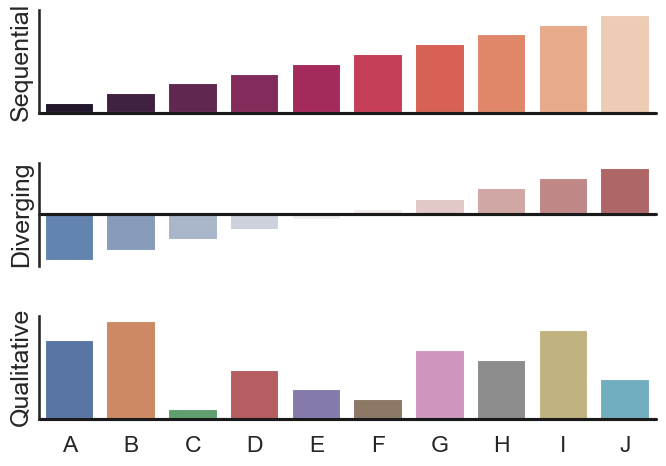

In [41]:
# Set the seaborn theme with a "white" background 
sns.set_theme(style="white", context="talk")

# Create a random number generator for reproducibility
rs = np.random.RandomState(18)

# Set up a 3-row, 1-column figure layout with shared x-axis
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)

# Generate some sequential data for demonstration
x = np.array(list("ABCDEFGHIJ"))  # Categorical labels
y1 = np.arange(1, 11)             # Sequential values from 1 to 10

# First plot: Sequential data with the "rocket" colormap
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)  # Draw a horizontal reference line at 0
ax1.set_ylabel("Sequential")              # Label the y-axis

# Second plot: Diverging data using a centered transformation
y2 = y1 - 5.5  # Centering values to make the data diverging
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)  # Reference line at 0
ax2.set_ylabel("Diverging")               # Label the y-axis

# Third plot: Qualitative data with random ordering
y3 = rs.choice(y1, len(y1), replace=False)  # Shuffle values randomly
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)  # Reference line at 0
ax3.set_ylabel("Qualitative")             # Label the y-axis

# Final adjustments to improve readability
sns.despine(bottom=True)     # Remove bottom spine for a cleaner look
plt.setp(f.axes, yticks=[])  # Remove y-axis ticks from all subplots
plt.tight_layout(h_pad=2)    # Adjust spacing between subplots for better layout

### Horizontal bar plots (barplot)

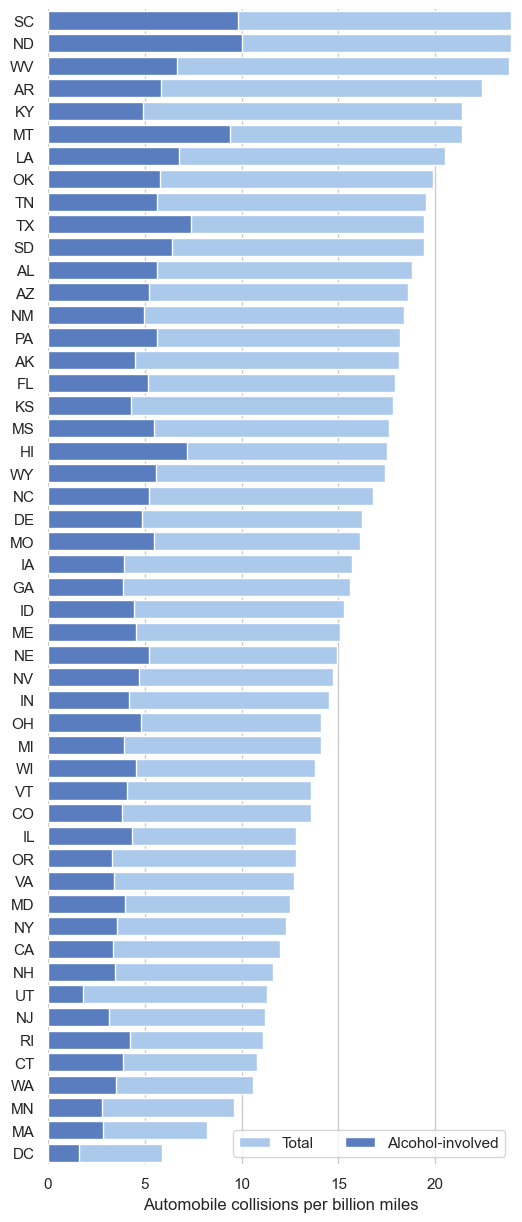

In [43]:
# Set the seaborn theme to "whitegrid"
sns.set_theme(style="whitegrid")

# Initialize a matplotlib figure and axis with a specific figure size
f, ax = plt.subplots(figsize=(6, 15))

# Load the example 'car_crash' dataset and sort it by total crashes in descending order
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total number of crashes with a pastel blue color for a softer visual effect
sns.set_color_codes("pastel")  # Use pastel color palette for the first bar
sns.barplot(data=crashes, x="total", y="abbrev",
            label="Total", color="b")  # "b" stands for blue

# Overlay the alcohol-related crashes using a muted blue color for contrast
sns.set_color_codes("muted")  # Use a more saturated color for emphasis
sns.barplot(data=crashes, x="alcohol", y="abbrev",
            label="Alcohol-involved", color="b")

# Add a legend with two columns, placed at the lower right of the plot
ax.legend(loc="lower right", ncol=2, frameon=True)

# Set axis labels and limits for better clarity
ax.set(
    xlabel="Automobile collisions per billion miles",  # Descriptive x-axis label
    xlim=(0, 24),  # Set x-axis limit to 24 crashes per billion miles
    ylabel="",  # Remove y-axis label (state abbreviations serve as labels)
)

# Remove the left and bottom spines to create a cleaner visual appearance
sns.despine(left=True, bottom=True)

### Grouped boxplots (boxplot)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

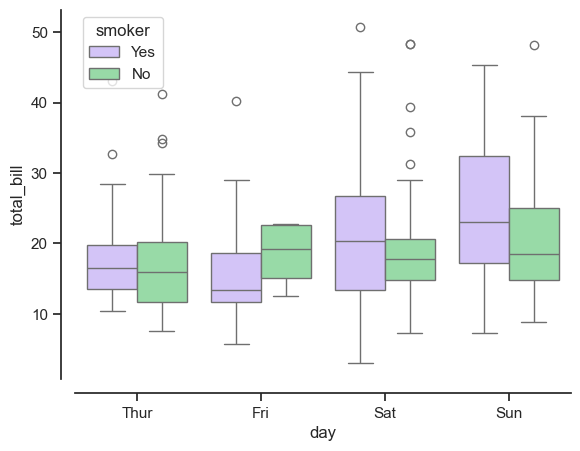

In [45]:
# Set the theme to 'ticks' and pastel color palette
sns.set_theme(style="ticks", palette="pastel")

# Load the built-in tips dataset
tips = sns.load_dataset("tips")

# Display the first 5 rows of the dataset
display(tips.head())

# Create a nested boxplot to show the distribution of total bills by day and smoker status
sns.boxplot(
    data=tips,                    # The dataset to plot
    x="day",                      # X-axis: day of the week (Thur, Fri, Sat, Sun)
    y="total_bill",              # Y-axis: total bill amount in dollars
    hue="smoker",                # Group boxes by smoker status (Yes/No)
    palette=["m", "g"]          # Use magenta for smokers and green for non-smokers
)

# Remove the top and right spines for a cleaner look
# Offset=10 adds a small gap between axes and spines
# Trim shortens the spine lines to the range of the data
sns.despine(offset=10, trim=False)

### Horizontal boxplot with observations (boxplot, stripplot)

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

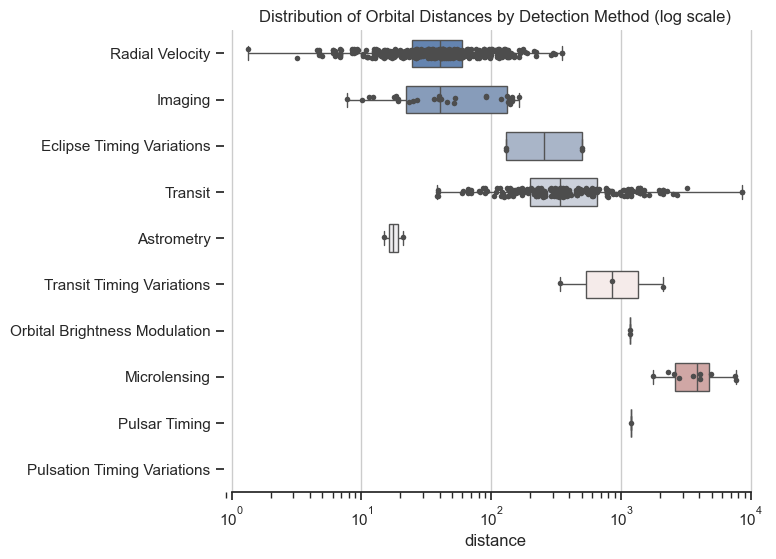

In [47]:
# Set the visual theme to 'ticks' for a minimal, clean aesthetic
sns.set_theme(style="ticks")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Display the first 5 rows of the dataset
display(planets.head())

# Initialize the figure and axis with a specified size
fig, ax = plt.subplots(figsize=(7, 6))

# Set the x-axis to a logarithmic scale to handle wide range of distances
ax.set_xscale("log")

# Plot a horizontal boxplot showing distance distributions by detection method
sns.boxplot(
    data=planets,
    x="distance",                  # X-axis: orbital distance (log scale)
    y="method",                    # Y-axis: detection method
    hue="method",                  # Color by method for visibility (though redundant here)
    whis=[0, 100],                 # Show full data range (min to max)
    width=0.6,                     # Thickness of the boxes
    palette="vlag"                 # Use a diverging blue-red palette
)

# Overlay individual data points with jitter for better visibility
sns.stripplot(
    planets,
    x="distance", y="method",      # Same variables
    size=4,                        # Dot size
    color=".3",                    # Medium gray color for contrast
    jitter=True,                   # Slight random jitter to prevent overlap
    dodge=True                     # Separate dots if multiple hues are used
)

# Add title 
ax.set_title("Distribution of Orbital Distances by Detection Method (log scale)")

# Add gridlines for readability
ax.xaxis.grid(True)

# Remove y-axis label (method names are already present)
ax.set(ylabel="")

# Clean up the plot by removing the left and right spines
sns.despine(trim=True, left=True)

### Grouped barplots (catplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

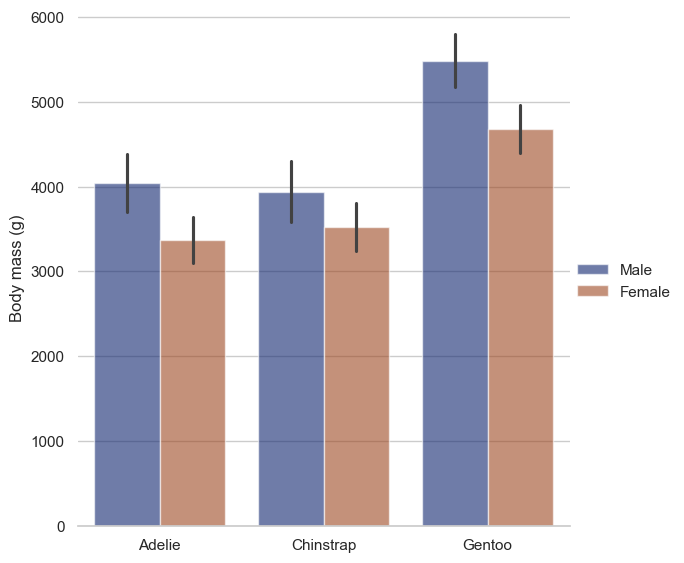

In [49]:
sns.set_theme(style="whitegrid")

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(penguins.head())

# Create a grouped bar plot (bar heights = mean body mass, grouped by sex within species)
g = sns.catplot(
    data=penguins,
    kind="bar",                    # Use bar plot (aggregated means)
    x="species",                   # X-axis: species (Adelie, Chinstrap, Gentoo)
    y="body_mass_g",               # Y-axis: average body mass in grams
    hue="sex",                     # Group bars by sex (Male, Female)
    errorbar="sd",                 # Show standard deviation as error bars
    height=6,                      # Height of the figure
    palette="dark",                # Use a dark color palette
    alpha=.6                      # Make bars semi-transparent
)

# Remove the left spine for cleaner aesthetics
g.despine(left=True)

# Label the Y-axis only (leave X-axis label empty)
g.set_axis_labels("", "Body mass (g)")

# Remove the legend title (just show labels: Male, Female)
g.legend.set_title("")

### Plotting a three-way ANOVA (catplot)

Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest

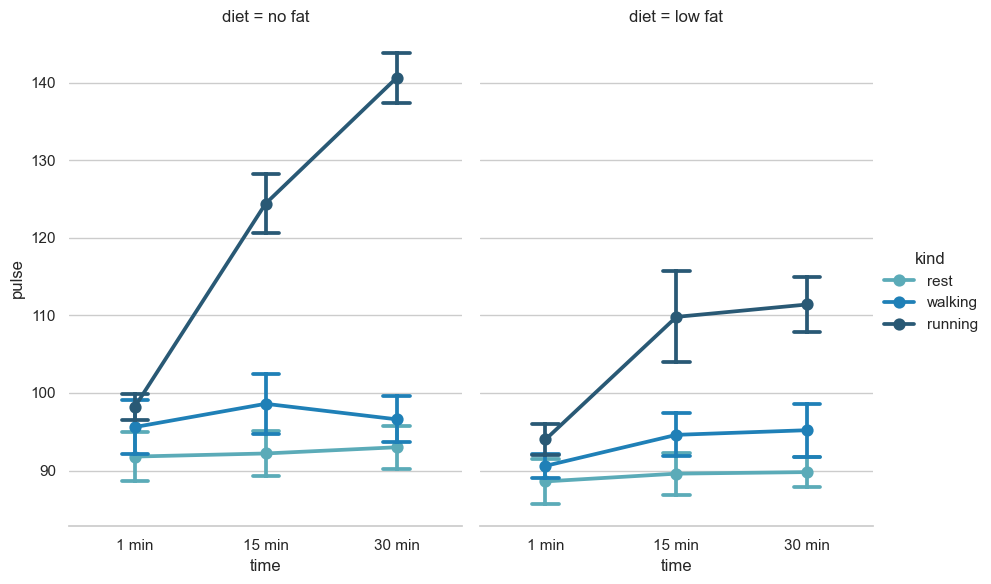

In [51]:
# Set the theme to "whitegrid"
sns.set_theme(style="whitegrid")

# Load the built-in 'exercise; dataset
exercise = sns.load_dataset("exercise")

# Display the first 5 rows of the dataset
display(exercise.head())

# Create a point plot to visualize pulse rate across different time points, exercise types, and diets
g = sns.catplot(
    data=exercise,    # The dataset containing pulse rate measurements
    x="time",         # X-axis: Time of measurement (1 min, 15 min, 30 min)
    y="pulse",        # Y-axis: Pulse rate (heart rate in beats per minute)
    kind="point",     # Use a point plot (dots connected by lines)
    hue="kind",       # Differentiate data points by type of exercise ("rest", "walking", "running")
    col="diet",       # Create separate subplots (facets) based on diet type ("low fat", "no fat")
    capsize=0.2,      # Add small caps to indicate error bar endpoints
    palette="YlGnBu_d", # Use a yellow-green-blue color palette for better distinction
    errorbar="se",    # Display standard error as error bars
    height=6,         # Set the height of each facet plot
    aspect=0.75       # Adjust aspect ratio for better readability
)

# Remove the left spine for a cleaner look
g.despine(left=True)

### Regression fit over a strip plot (catplot, regplot)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

<Axes: xlabel='cylinders', ylabel='acceleration'>

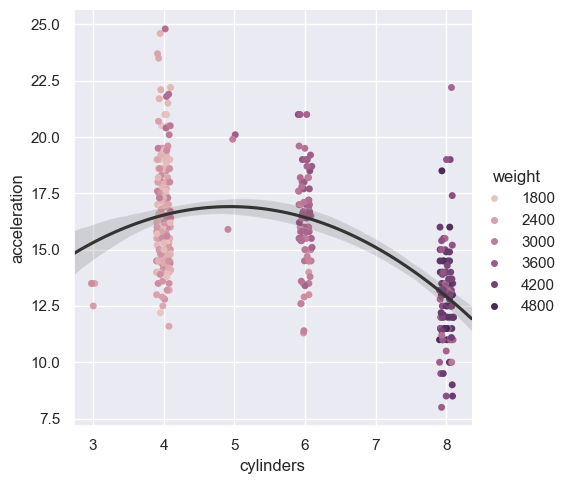

In [53]:
# Set the seaborn theme to default
sns.set_theme()

# Load the example 'mpg' dataset
mpg = sns.load_dataset("mpg")

# Display the first 5 rows of the dataset
display(mpg.head())

# Create a categorical plot (catplot) to show 'acceleration' vs 'cylinders' 
# The color of the points is determined by 'weight' (hue), using native scale for color
sns.catplot(
    data=mpg,                        # Dataset to be used
    x="cylinders",                   # Categorical variable for x-axis
    y="acceleration",                # Numeric variable for y-axis
    hue="weight",                    # Color points based on the 'weight' column
    native_scale=True,               # Ensure the scale of 'weight' is kept native (not normalized)
    zorder=1                         # Set the plot layer order (foreground)
)

# Add a regression plot (regplot) to show the trend of acceleration vs cylinders
# The scatter plot is turned off (scatter=False) and we fit a second-order polynomial (order=2)
sns.regplot(
    data=mpg,                        # Dataset for the regression plot
    x="cylinders",                   # x-axis variable
    y="acceleration",                # y-axis variable
    scatter=False,                   # Disable the scatter plot (only the regression line is shown)
    truncate=False,                  # Do not truncate the regression line (show full line)
    order=2,                         # Fit a second-order polynomial (quadratic regression)
    color=".2",                      # Set the color of the regression line (dark gray)
)

### Grouped violinplots with split violins (violinplot)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Axes: xlabel='day', ylabel='total_bill'>

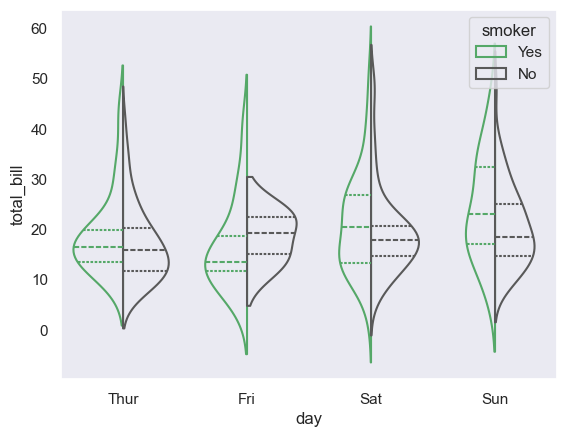

In [55]:
# Set the visual theme to 'dark' for a dark background style
sns.set_theme(style="dark")

# Load the built-in 'tips' dataset
tips = sns.load_dataset("tips")

# Display the first 5 rows of the dataset
display(tips.head())

# Create a nested violin plot to show the distribution of total bills by day and smoker status
sns.violinplot(
    data=tips,
    x="day",                      # X-axis: days of the week (Thur, Fri, Sat, Sun)
    y="total_bill",              # Y-axis: total bill amount in dollars
    hue="smoker",                # Split violins by smoker status (Yes/No)
    split=True,                  # Merge the two hue categories into one violin shape per day
    inner="quart",               # Show the quartiles inside the violins (like a boxplot)
    fill=False,                  # Do not fill the violins (outline only for a cleaner look)
    palette={"Yes": "g", "No": ".35"}  # Use green for smokers, and dark gray for non-smokers
)

### Horizontal, unfilled violinplots (violinplot)

Date  Extent  Decade
0 1980-01-01  14.200    1980
1 1980-01-03  14.302    1980
2 1980-01-05  14.414    1980
3 1980-01-07  14.518    1980
4 1980-01-09  14.594    1980

<Axes: xlabel='Extent', ylabel='Decade'>

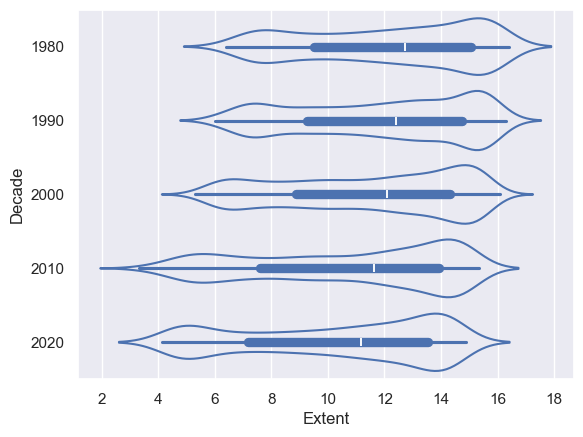

In [57]:
# Set the default seaborn theme for the plot
sns.set_theme()

# Load the built-in 'seaice' dataset
seaice = sns.load_dataset("seaice")

# Create a new column 'Decade' by rounding the 'Date' column's year to the nearest decade
seaice["Decade"] = seaice["Date"].dt.year.round(-1)

# Display the first 5 rows of the dataset
display(seaice.head())

# Create a violin plot to visualize the distribution of 'Extent' across different decades
sns.violinplot(
    seaice,                         # Dataset containing the sea ice data
    x="Extent",                     # Sea ice extent (on the x-axis)
    y="Decade",                     # Decade (on the y-axis)
    orient="y",                     # Orient the plot horizontally
    fill=False                      # Disable fill to only show the outline of the violins
)

### Violinplot from a wide-form dataset (violinplot)

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

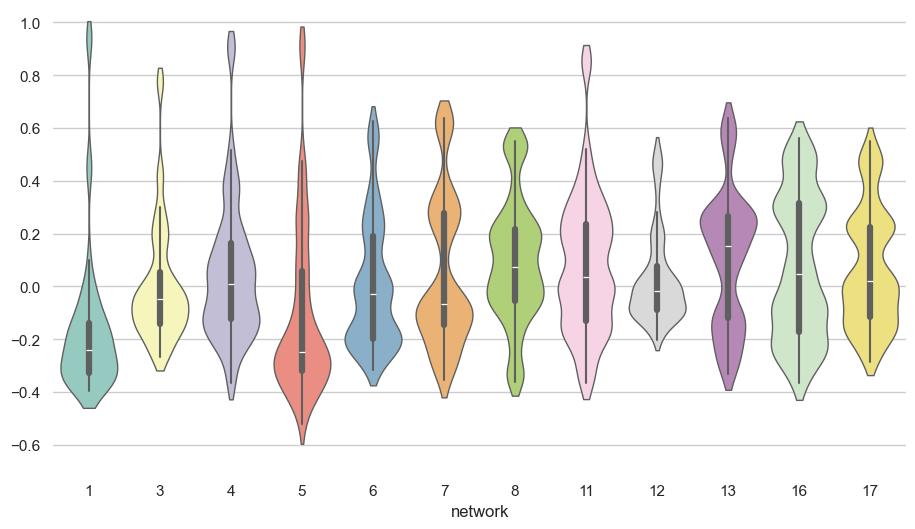

In [59]:
# Set the theme to 'whitegrid' for a clean background with gridlines
sns.set_theme(style="whitegrid")

# Load the brain network correlation dataset with multi-level headers
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Display the first 5 rows of the dataset
display(df.head())

# Define a list of network IDs we want to include in the analysis
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]

# Select columns where the 'network' level matches the desired networks
used_columns = (
    df.columns.get_level_values("network")
      .astype(int)
      .isin(used_networks)
)
df = df.loc[:, used_columns]  # Keep only the relevant columns

# Compute the correlation matrix of the selected data
# Then, group by the 'network' level and take the average
corr_df = df.corr().groupby(level="network").mean()

# Clean up index for plotting
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T  # Transpose to have networks on x-axis

# Set up the plot figure size
fig, ax = plt.subplots(figsize=(11, 6))

# Draw a violin plot of the average correlation values for each network
sns.violinplot(
    data=corr_df,
    bw_adjust=0.5,            # Reduce the bandwidth for a tighter fit
    cut=1,                  # Limit the range of the KDE to the data range
    linewidth=1,              # Set line thickness of violin borders
    palette="Set3"            # Use a colorful, readable palette
)

# Set the y-axis range and clean up the plot
ax.set(ylim=(-0.7, 1.05))     # Define y-axis limits for clarity
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines

### Plotting large distributions (boxenplot)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<Axes: xlabel='clarity', ylabel='carat'>

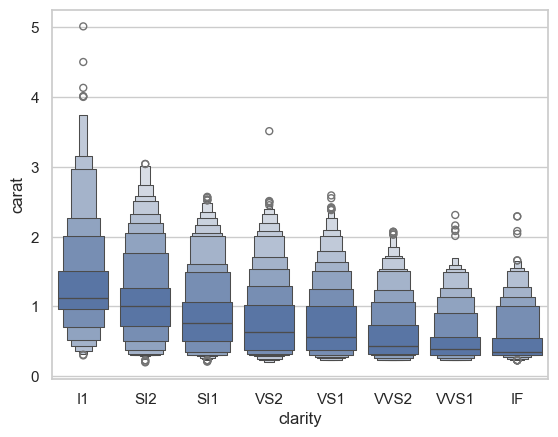

In [61]:
# Set the theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Load the built-in 'diamonds' dataset
diamonds = sns.load_dataset("diamonds")

# Display the first 5 rows of the dataset
display(diamonds.head())

# Define a custom order for the clarity categories (from lowest to highest quality)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Create a boxen plot to visualize the distribution of carat weight by clarity
sns.boxenplot(
    data=diamonds,
    x="clarity",                  # X-axis: clarity categories
    y="carat",                    # Y-axis: carat weight of the diamonds
    color="b",                    # Use blue color for all boxes
    order=clarity_ranking,        # Use custom clarity order (low to high quality)
    width_method="linear"         # Box widths scale linearly with the number of observations. Options: "linear" (default) and "exponential"
)

### Conditional means with observations (stripplot, pointplot)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

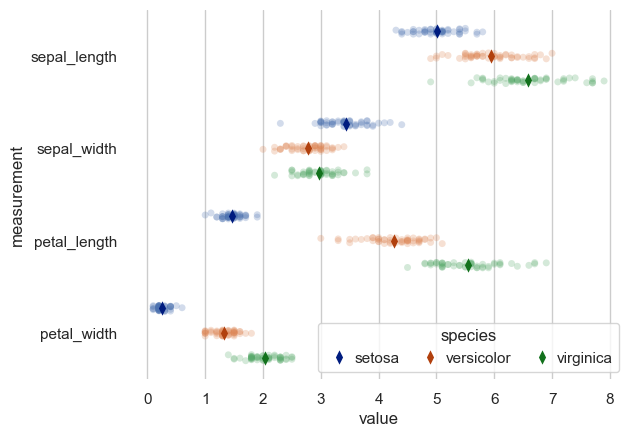

In [63]:
# Set the visual theme to 'whitegrid' for a clean, readable background
sns.set_theme(style="whitegrid")

# Load the built-in 'iris' dataset
iris = sns.load_dataset("iris")

# Display the first 5 rows of the dataset
display(iris.head())

# Reshape the dataset from wide to long-form ('tidy') format for easier plotting
iris = iris.melt(id_vars="species", var_name="measurement")

# Initialize a matplotlib figure and axis
fig, ax = plt.subplots()

# Remove the bottom and left spines for a cleaner look
sns.despine(bottom=True, left=True)

# Plot individual data points as a scatterplot to show distributions and overlap
sns.stripplot(
    data=iris,                # Dataset containing iris flower measurements
    x="value",                # Numerical values to plot on the x-axis
    y="measurement",          # Categorical measurement types on the y-axis
    hue="species",            # Differentiate points by species with colors
    dodge=True,               # Separate points by species to avoid overlap
    alpha=0.25,               # Set transparency to clearly see overlapping points
    zorder=1,                 # Set drawing order behind other plot elements
    legend=False,             # Turn off automatic legend to customize later
)

# Overlay point plots to highlight conditional means clearly, adjusting the position (dodge)
sns.pointplot(
    data=iris,                      # Same iris dataset for overlay
    x="value",                      # Numerical values to show means on the x-axis
    y="measurement",                # Categorical measurement types on the y-axis
    hue="species",                  # Color points according to species
    dodge=0.8 - 0.8 / 3,            # Adjust horizontal alignment to match stripplot grouping
    palette="dark",                 # Use dark palette for high visibility of mean points
    errorbar=None,                  # Remove error bars to simplify visualization
    markers="d",                    # Diamond-shaped markers for clear distinction
    markersize=4,                   # Moderate marker size for better readability
    linestyle="none",               # Omit connecting lines for simplicity
)

# Enhance legend positioning and appearance for better readability
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)

### Scatterplot with categorical variables (swarmplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

[Text(10.250000000000002, 0.5, '')]

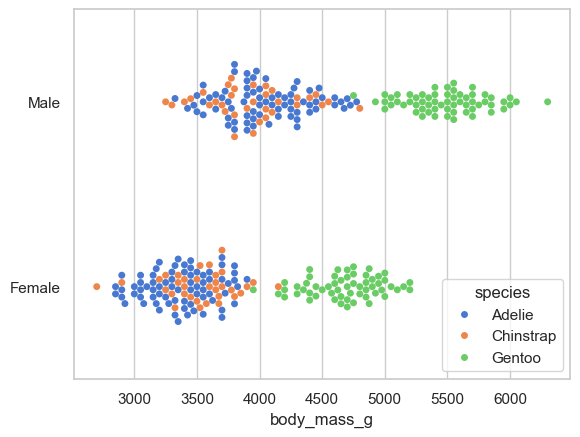

In [65]:
# Set the vasual theme to 'whitegrid'
sns.set_theme(style="whitegrid", palette="muted")

# Load the built-in 'penguins' dataset
df = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(df.head())

# Create a categorical scatterplot (swarm plot) 
ax = sns.swarmplot(
    data=df,         # Dataset containing penguin measurements
    x="body_mass_g", # Plot body mass (grams) on the x-axis
    y="sex",         # Plot sex (male/female) on the y-axis
    hue="species"    # Color points by species for better differentiation
)

# Remove the y-axis label for a cleaner look
ax.set(ylabel="")

## Regression plots

- [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot): Plot data and regression model fits across a FacetGrid.

- [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot): Plot data and a linear regression model fit.

- [`residplot`](https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn.residplot): Plot the residuals of a linear regression.

### Anscombe’s quartet (lmplot)

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

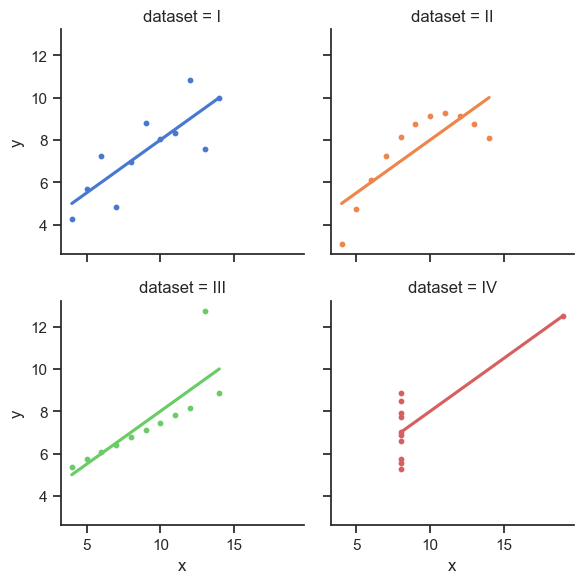

In [68]:
# Set the visual theme to 'darkgrid'
sns.set_theme(style="ticks") # Options: darkgrid (default style), white grid, dark, white and ticks.

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Display the first 5 rows of the dataset
display(df.head())

# Plot linear regression lines for each dataset within the DataFrame
sns.lmplot(
    data=df,
    x="x", y="y",                  # X and Y variables to plot
    hue="dataset",                 # Color-code each dataset differently
    col="dataset",                 # Create separate subplots (facets) for each dataset
    col_wrap=2,                    # Wrap the facets into two columns
    palette="muted",               # Use a soft color palette for clarity
    ci=None,                       # Disable confidence interval shading around regression line
    height=3,                      # Height of each subplot in inches
    scatter_kws={"s": 10, "alpha": 1}  # Customize scatter points (small and opaque)
)

### Faceted logistic regression (lmplot)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

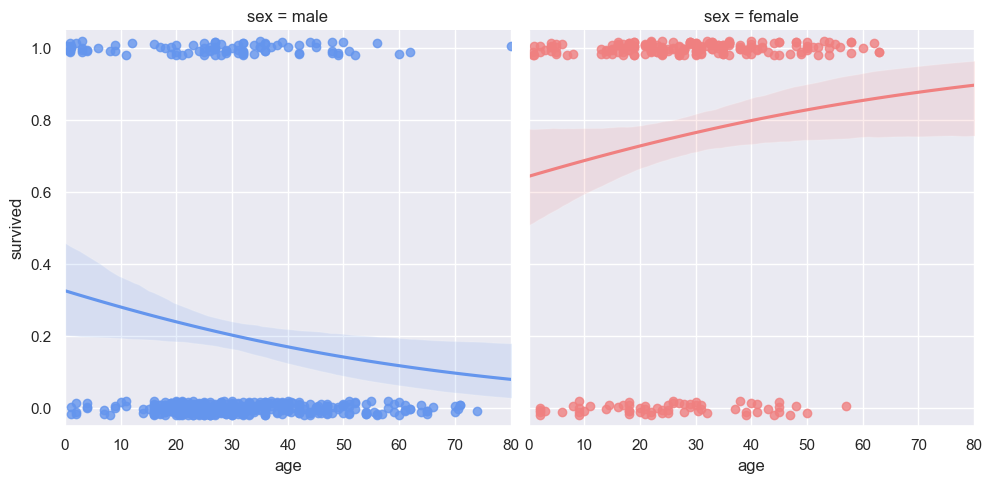

In [70]:
# Set the visual theme to 'darkgrid' 
sns.set_theme(style="darkgrid")

# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Display the first 5 rows of the dataset
display(df.head())

# Define a custom color palette for male and female
pal = dict(male="#6495ED", female="#F08080")  # Blue for male, coral for female

# Create logistic regression plots to show survival probability by age and sex
g = sns.lmplot(
    data=df,                        # Input dataset
    x="age", y="survived",          # X-axis: passenger age, Y-axis: survival (0 or 1)
    hue="sex",                      # Color lines and points by gender
    col="sex",                      # Create separate plots for each gender
    palette=pal,                    # Apply the custom gender-based color palette
    y_jitter=0.02,                  # Add slight vertical jitter to avoid point overlap
    logistic=True,                  # Use logistic regression (since y is binary)
    truncate=False                  # Show the full regression curve, not truncated to central data
)

# Set consistent axis limits across facets
g.set(xlim=(0, 80), ylim=(-0.05, 1.05))

### Multiple linear regression (lmplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

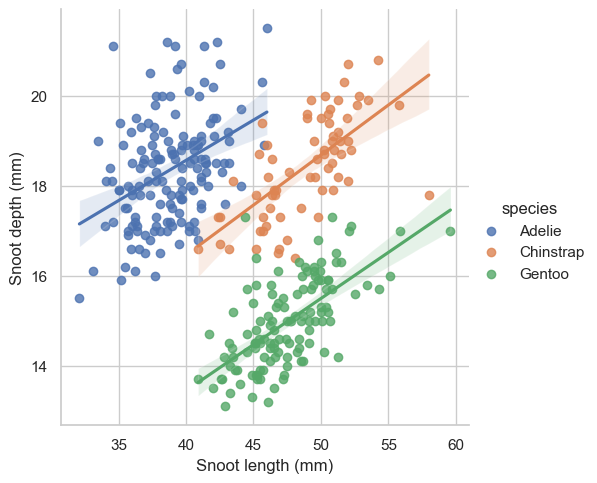

In [72]:
# Set the visual theme to 'whitegrid' 
sns.set_theme(style="whitegrid")

# Load the built-in 'penguins' dataset
penguins = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(penguins.head())

# Create a scatter plot with a regression line (lmplot)
g = sns.lmplot(
    data=penguins,         # Dataset containing penguin measurements
    x="bill_length_mm",    # Bill length plotted on the x-axis
    y="bill_depth_mm",     # Bill depth plotted on the y-axis
    hue="species",         # Differentiate species using different colors
    height=5              # Adjust the size of the figure for readability
)

# Use more informative axis labels than the default ones
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

### Plotting model residuals (residplot)

<Axes: >

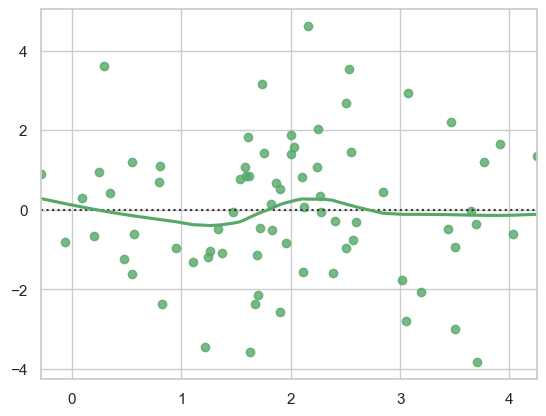

In [74]:
# Set the visual theme to 'whitegrid' 
sns.set_theme(style="whitegrid")

# Generate an example dataset with a linear relationship
rs = np.random.RandomState(7)  # Initialize a random seed for reproducibility

# Create an array of 75 random values normally distributed around mean=2, std=1
x = rs.normal(2, 1, 75)  

# Generate corresponding y-values using a linear equation with some noise
y = 2 + 1.5 * x + rs.normal(0, 2, 75)  # y = 2 + 1.5x + noise

# Create a residual plot to visualize how well a linear model fits the data
sns.residplot(
    x=x,         # Independent variable (predictor)
    y=y,         # Dependent variable (response)
    lowess=True, # Apply locally weighted regression to smooth residuals
    color="g"    # Use green color for the residual plot
)

## Matrix plots

- [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap): Plot rectangular data as a color-encoded matrix.

- [`clustermap`](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap): Plot a matrix dataset as a hierarchically-clustered heatmap.


### Annotated heatmaps (heatmap)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

<Axes: xlabel='year', ylabel='month'>

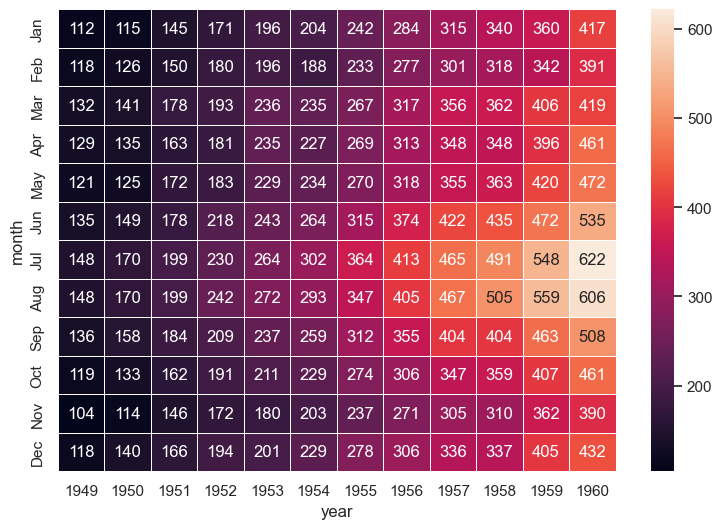

In [77]:
# Set the seaborn theme to the default style
sns.set_theme()

# Load the built-in 'flights' dataset 
flights_long = sns.load_dataset("flights")

# Convert the data to long-form by pivoting the table:
# 'month' is set as the index, 'year' becomes columns, and 'passengers' are the values.
flights = flights_long.pivot(index="month", columns="year", values="passengers")

# Display the first 5 rows of the dataset
display(flights.head())

# Create a heatmap of the data showing the number of passengers for each month across years
f, ax = plt.subplots(figsize=(9, 6))  # Set the figure size
sns.heatmap(flights, 
            annot=True,             # Annotate each cell with the numeric value
            fmt="d",                # Format the annotations as integers
            linewidths=.5,          # Set the linewidth between cells
            ax=ax)                  # Set the axes for the heatmap

### Plotting a diagonal correlation matrix (heatmap)

A         B         C         D         E         F         G  \
A  1.000000 -0.107401 -0.086468  0.000131  0.035047  0.004749  0.028226   
B -0.107401  1.000000  0.254632  0.061506  0.043581 -0.078019  0.069133   
C -0.086468  0.254632  1.000000 -0.033682 -0.127464  0.141223  0.164793   
D  0.000131  0.061506 -0.033682  1.000000  0.086054 -0.153212 -0.000963   
E  0.035047  0.043581 -0.127464  0.086054  1.000000 -0.007159  0.157224   

          H         I         J  ...         Q         R         S         T  \
A  0.000422  0.132100  0.057720  ...  0.073645 -0.055396 -0.058241 -0.123823   
B -0.211278 -0.011796  0.085277  ...  0.031315  0.100451 -0.103068  0.011187   
C -0.188574 -0.230059  0.145777  ...  0.010497  0.051872  0.084793  0.167976   
D -0.017282 -0.109283  0.011056  ... -0.136959 -0.061816  0.134112  0.081143   
E -0.096254  0.043785  0.015117  ...  0.090499  0.041276  0.076138  0.027021   

          U         V         W         X         Y         Z  
A  0.096451 -0.015178  0.172725  0.003791  0.005531 -0.011534  
B -0.008536 -0.030730 -0.022978 -0.050483 -0.014468  0.078737  
C -0.043806 -0.057125  0.125580 -0.068426 -0.052764  0.094661  
D  0.124706  0.194911 -0.016944 -0.116963  0.054315  0.014383  
E  0.069976 -0.021745  0.104822 -0.047913  0.120465  0.080980  

[5 rows x 26 columns]

<Axes: >

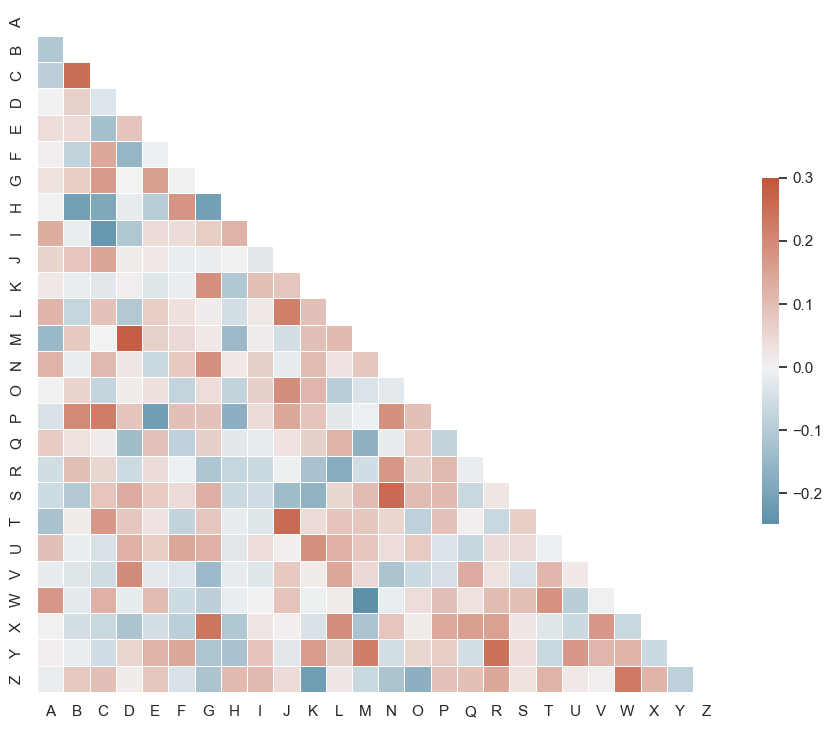

In [79]:
from string import ascii_letters

# Set the visual theme to 'white'
sns.set_theme(style="white")

# Generate a random dataset with 26 columns
rs = np.random.RandomState(33)                     # Random seed for reproducibility
df = pd.DataFrame(
    data=rs.normal(size=(100, 26)),                # 100 rows × 26 columns of standard normal values
    columns=list(ascii_letters[26:])               # Use lowercase letters (a-z) as column names
)

# Compute the correlation matrix
corr = df.corr()

# Display the first 5 rows
display(corr.head())

# Create a mask for the upper triangle (since correlation matrices are symmetric)
mask = np.triu(np.ones_like(corr, dtype=bool))     # Upper triangle = True (to be masked)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))              # Create a large square-ish figure

# Create a custom diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Blue to red diverging map

# --- Draw the heatmap with the mask and customized styling ---
sns.heatmap(
    data=corr,                 # Correlation matrix as input
    vmax=0.3,                  # Clamp the upper range of the colorbar
    cmap=cmap,                 # Use custom diverging colormap
    center=0,                  # Center the colormap at zero (neutral correlation)
    square=True,               # Force square cells
    linewidths=0.5,            # Thin white lines between cells
    mask=mask,                 # Mask upper triangle for cleaner look
    cbar_kws={"shrink": 0.5}   # Shrink colorbar for better aesthetics
)

### Discovering structure in heatmap data (clustermap)

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

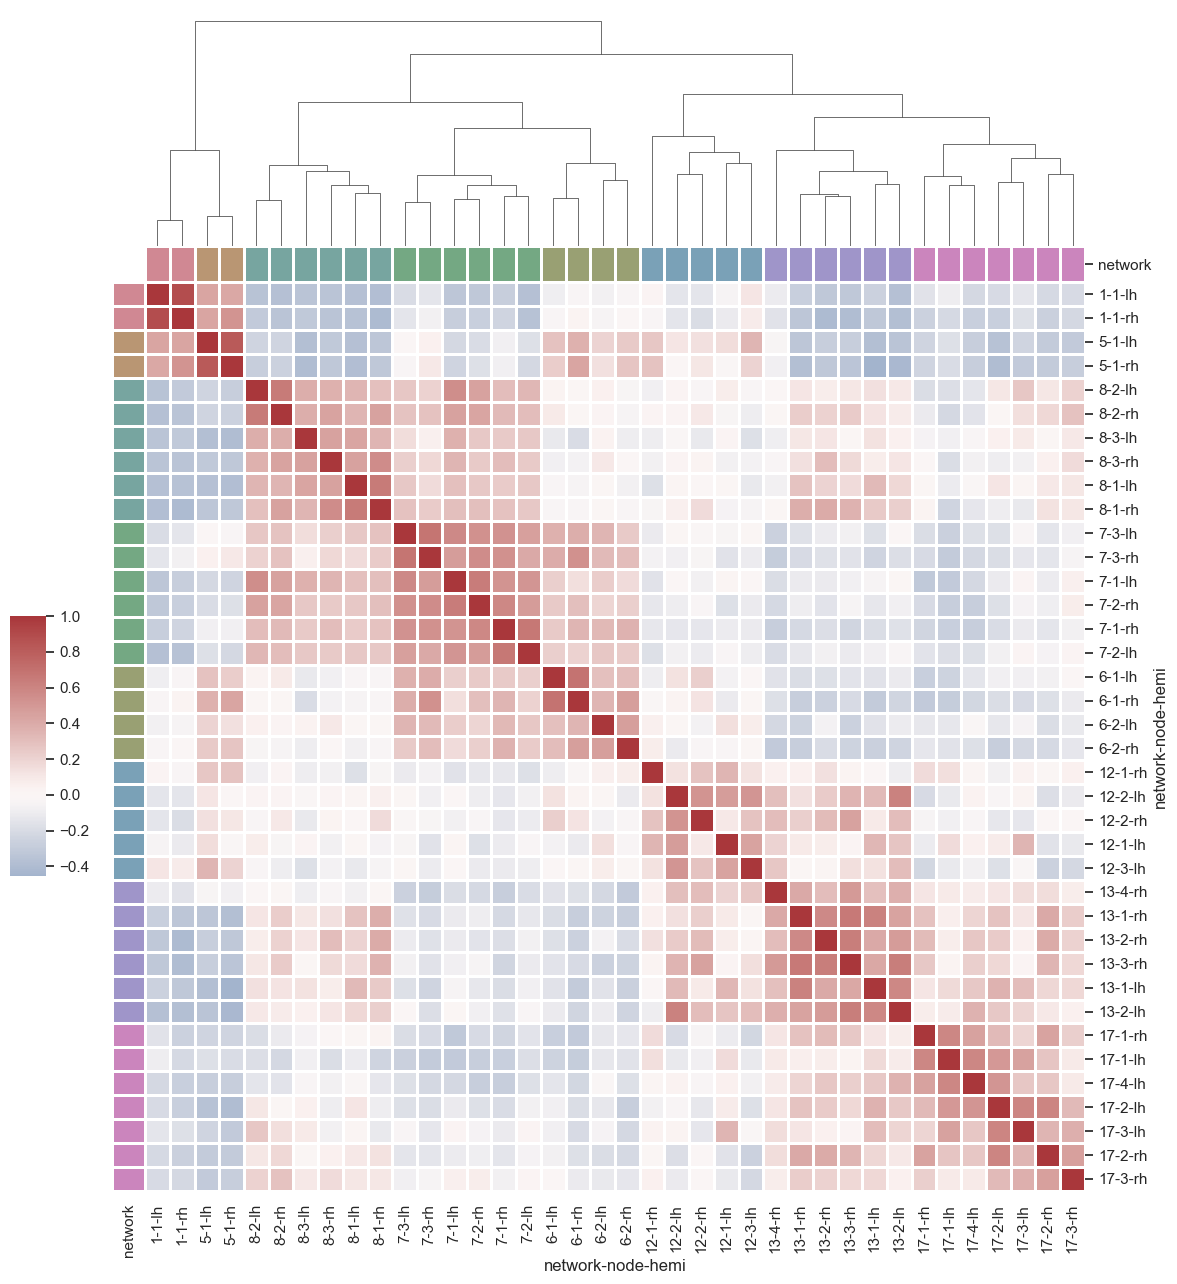

In [81]:
# Set the seaborn theme to default
sns.set_theme()

# Load the 'brain_networks' dataset, specifying multi-level column headers and the first column as the index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Display the first 5 rows of the dataset
display(df.head())

# Select a subset of networks for analysis
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]  # List of network IDs to keep
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))  # Filter columns to keep only the specified networks
df = df.loc[:, used_columns]  # Apply the column filter

# Create a categorical color palette for the networks
network_pal = sns.husl_palette(8, s=.45)  # Generate a palette with 8 distinct colors
network_lut = dict(zip(map(str, used_networks), network_pal))  # Map network IDs to colors

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")  # Get network IDs from column headers
network_colors = pd.Series(networks, index=df.columns).map(network_lut)  # Map network colors

# Draw a clustermap of the correlation matrix
g = sns.clustermap(df.corr(), center=0, cmap="vlag",  # Generate a correlation matrix and plot
                   row_colors=network_colors, col_colors=network_colors,  # Add color annotations
                   dendrogram_ratio=(.1, .2),  # Adjust the size ratio of the dendrogram
                   cbar_pos=(.02, .32, .03, .2),  # Position the colorbar
                   linewidths=.75, figsize=(12, 13))  # Set plot size and line width for matrix

# Remove the row dendrogram (optional, depending on visual preference)
g.ax_row_dendrogram.remove()

## Multi-plot grids

### Facet grids
- [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid): Multi-plot grid for plotting conditional relationships.

### Pair grids
- [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot): Plot pairwise relationships in a dataset.
- [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid): Subplot grid for plotting pairwise relationships in a dataset.

### Joint grids
- [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot): Draw a plot of two variables with bivariate and univariate graphs.
- [`JointGrid`](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid): Grid for drawing a bivariate plot with marginal univariate plots.


### FacetGrid with custom projection (FacetGrid)

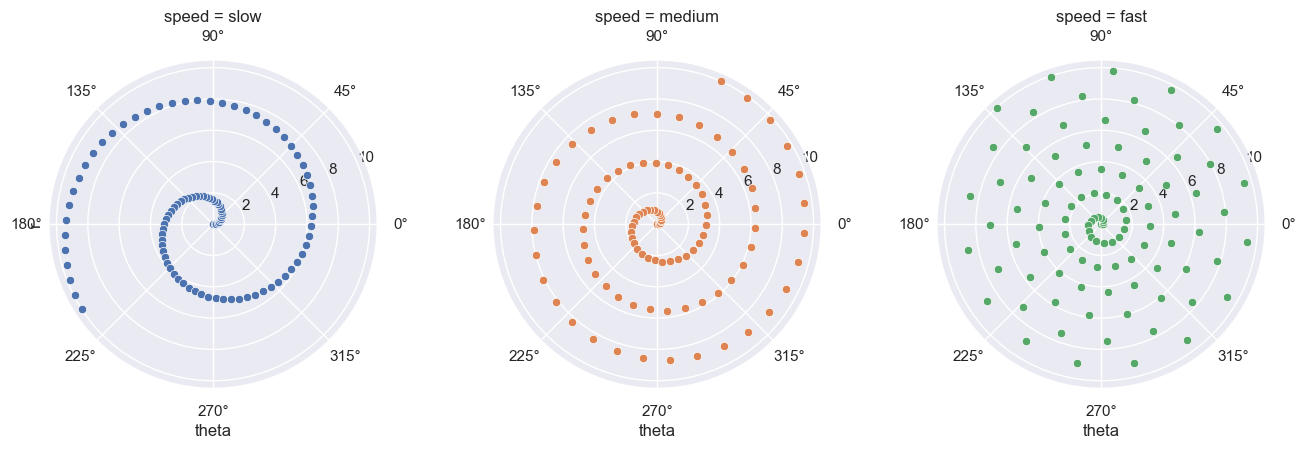

In [84]:
# Set the default seaborn theme for styling
sns.set_theme()

# Generate an example radial dataset
r = np.linspace(0, 10, num=100)  # Create 100 evenly spaced values from 0 to 10
df = pd.DataFrame({
    'r': r,           # Radial coordinate
    'slow': r,        # Theta value increases slowly
    'medium': 2 * r,  # Theta value increases at twice the rate
    'fast': 4 * r     # Theta value increases at four times the rate
})

# Convert the DataFrame to long-form (tidy format) for seaborn compatibility
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a FacetGrid with a polar projection
g = sns.FacetGrid(df, hue="speed", col="speed", 
                  subplot_kws=dict(projection='polar'), # Each subplot is in polar coordinates
                  height=4.5, sharex=False, sharey=False, despine=False)

# Draw scatter plots onto each polar axes
g.map(sns.scatterplot, "theta", "r")

### Overlapping densities (‘ridge plot’) (FacetGrid)

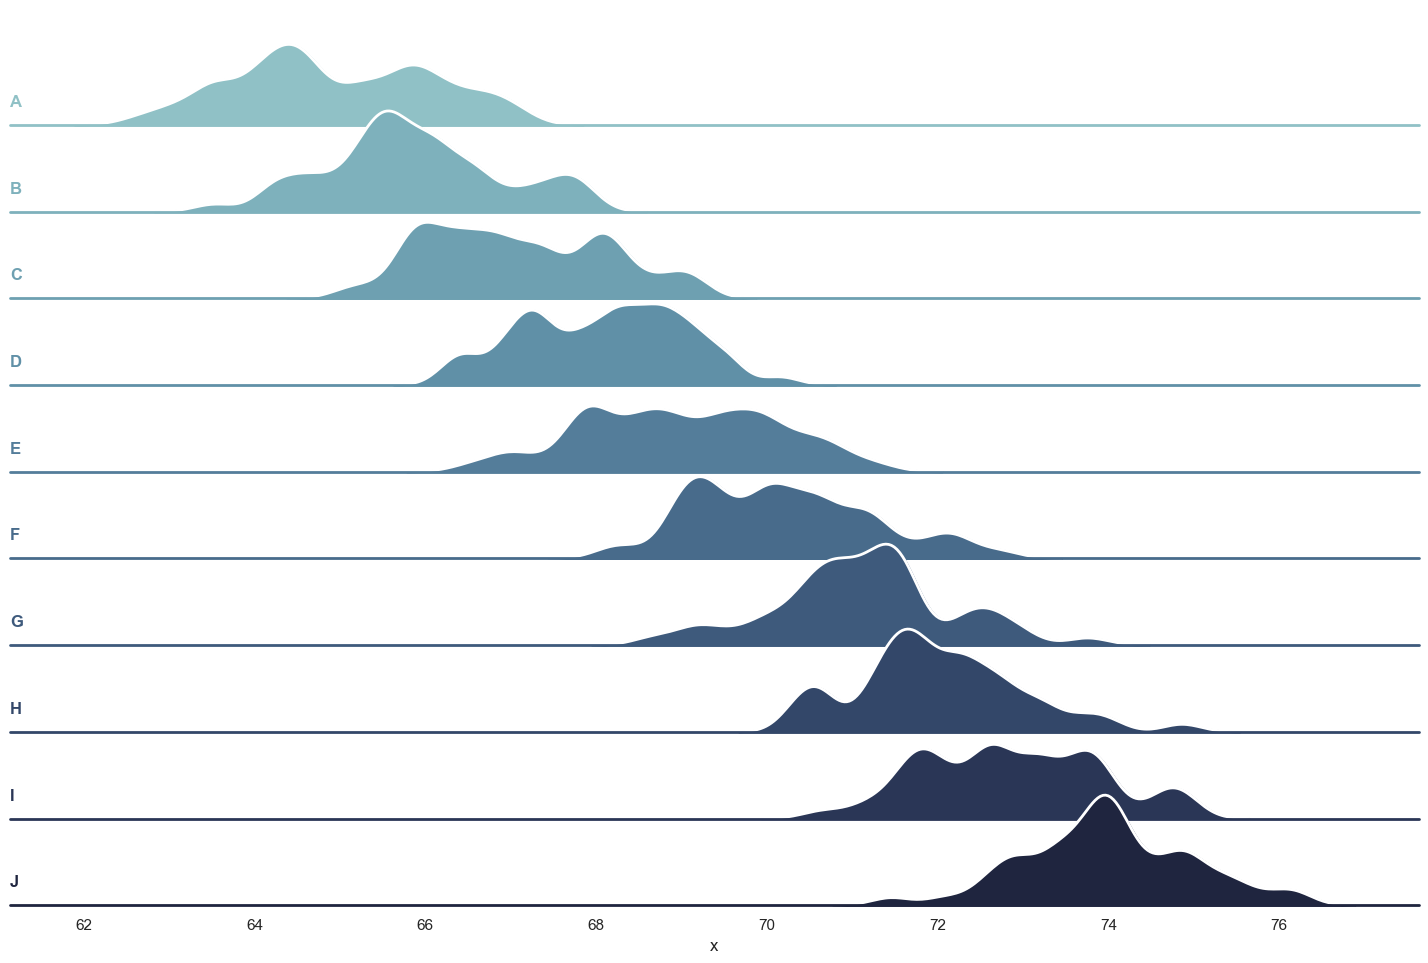

In [86]:
# Set 'white' style with transparent axes
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Generate random data for the example
rs = np.random.RandomState(1979)
x = rs.randn(500)                          # Generate random numbers
g = np.tile(list("ABCDEFGHIJ"), 50)        # Create groups labeled A–J
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)                          # Convert group labels to numeric
df["x"] += m                               # Offset data by group for distinct distributions

# Create a palette using seaborn’s cubehelix for distinct, attractive colors
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

# Initialize a FacetGrid to create multiple density plots stacked vertically by group
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1, palette=pal)

# Draw filled KDE plots (density plots) for each group with fine-tuned parameters
g.map(sns.kdeplot, "x",
      clip_on=False,     # Adjust smoothness and avoid clipping edges
      fill=True, alpha=1, 
      bw_adjust=.5, linewidth=1.5)

# Overlay each filled KDE plot with a white-lined KDE for clearer contours
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Draw a reference line at y=0 for visual clarity; color is inherited from hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Function to label each subplot clearly and neatly
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

# Apply labels to each subplot using the defined labeling function
g.map(label, "x")

# Adjust subplot spacing for attractive overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove subplot titles and unnecessary y-axis details to enhance visual clarity
g.set_titles("")
g.set(ylabel="", yticks=[])

# Remove axes spines (lines) from bottom and left sides for cleaner presentation
g.despine(bottom=True, left=True)

### Plotting on a large number of facets (FacetGrid)

position  step  walk
0         0     0     0
1         1     1     0
2         1     2     0
3         1     3     0
4         0     4     0

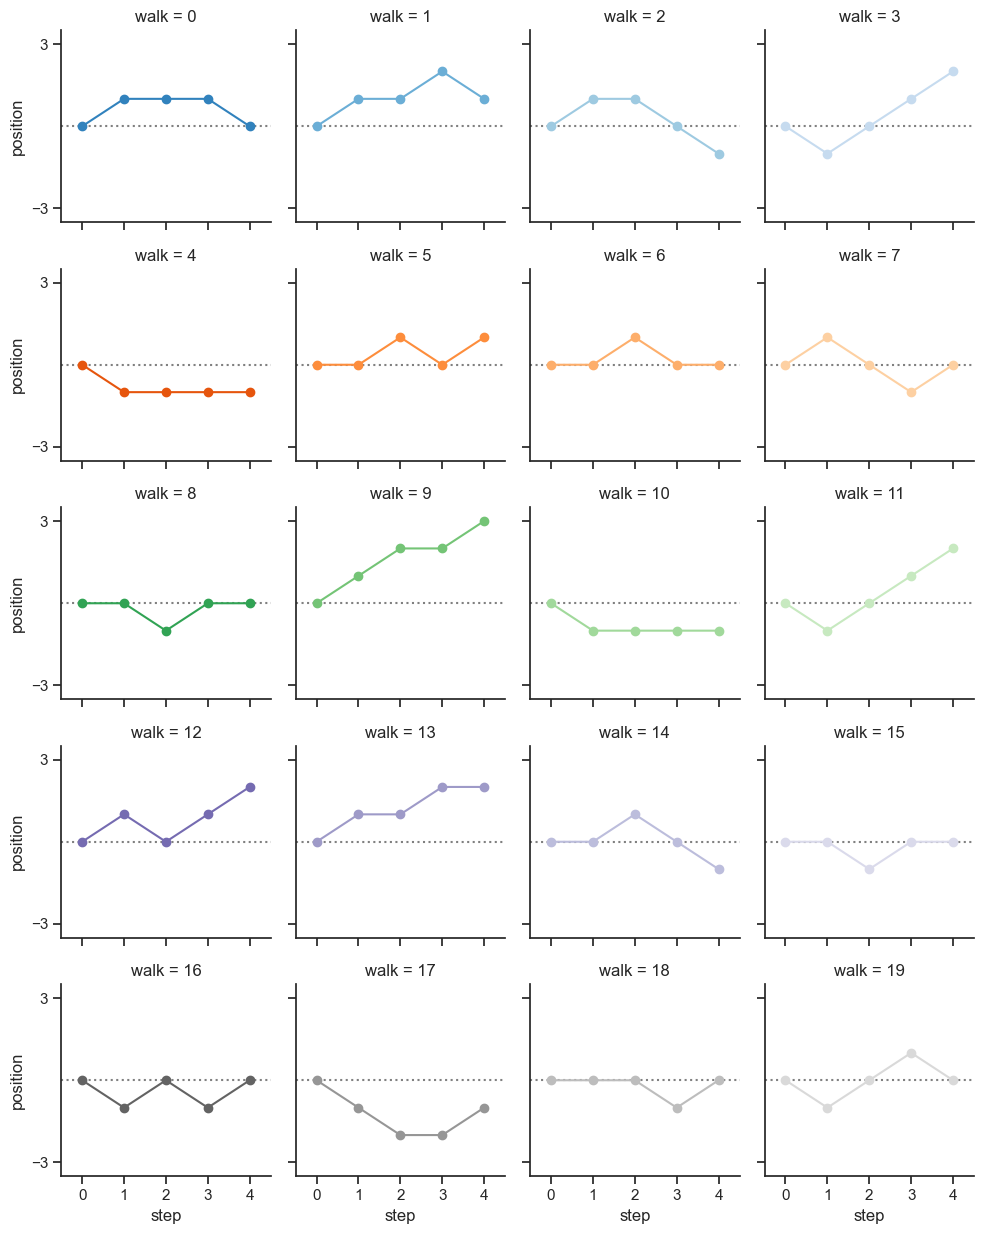

In [88]:
# Set seaborn's visual theme to 'ticks' 
sns.set_theme(style="ticks")

# Generate 20 short random walks of 5 steps each
rs = np.random.RandomState(4)                        # Set random seed for reproducibility

pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)      # Cumulative sum of steps [-1, 0, 1]
pos -= pos[:, 0, np.newaxis]                         # Normalize: all walks start at 0

step = np.tile(range(5), 20)                         # Repeats [0,1,2,3,4] for each walk
walk = np.repeat(range(20), 5)                       # Walk number repeated 5 times

# Combine into a DataFrame
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Display the first 5 rows of the dataset
display(df.head())

# Initialize a grid of subplots: one for each walk
grid = sns.FacetGrid(
    df,
    hue="walk",                       # Color by walk (to differentiate lines)
    col="walk",                       # Facet each subplot by walk number
    col_wrap=4,                       # Arrange plots in 4 columns
    palette="tab20c",                 # Distinct 20-color palette
    height=2.5                        # Height of each subplot
)

# Draw a horizontal dotted line at y=0 (the starting position)
grid.refline(y=0, linestyle=":")

# Plot each random walk as a line with circular markers
grid.map(plt.plot, "step", "position", marker="o")

# Customize axis ticks and limits for consistency across all subplots ---
grid.set(
    xlim=(-0.5, 4.5), ylim=(-3.5, 3.5),
    xticks=np.arange(5),             # Steps from 0 to 4
    yticks=[-3, 3]                  # Vertical bounds for clarity
)

# Tighten layout to reduce whitespace
grid.fig.tight_layout(w_pad=1)       # Adjust padding between plots

### Paired density and scatterplot matrix (PairGrid)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

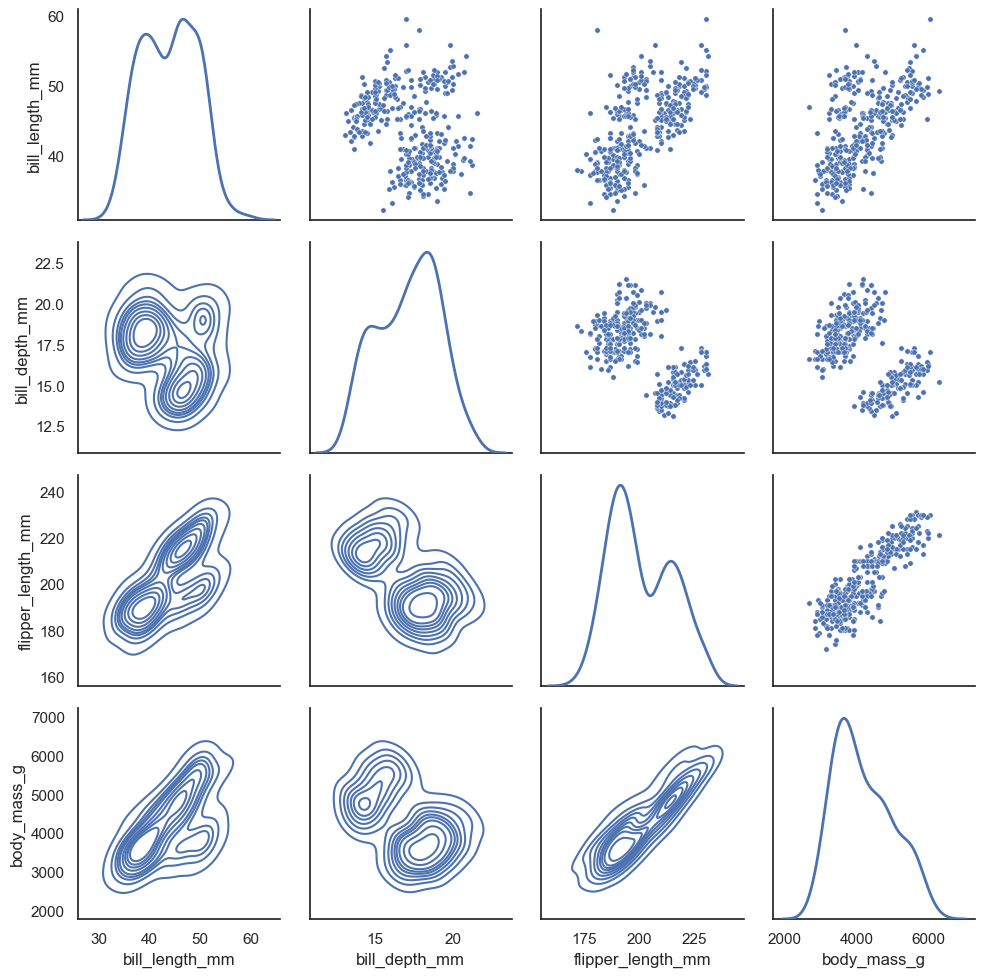

In [90]:
# Set the visual theme to 'white'
sns.set_theme(style="white")

# Load the built-in 'penguins' dataset
df = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(df.head())

# Initialize a PairGrid to visualize pairwise relationships between numerical variables
# - diag_sharey=False ensures that diagonal plots have independent y-axis scaling
g = sns.PairGrid(df, diag_sharey=False)

# Map scatter plots to the upper triangle to show pairwise relationships
# - s=15 sets the marker size for better visibility
g.map_upper(sns.scatterplot, s=15)

# Map kernel density estimates (KDE) to the lower triangle for smooth distribution visualization
g.map_lower(sns.kdeplot)

# Map KDE plots to the diagonal for individual variable distributions
# - lw=2 sets the line width for better readability
g.map_diag(sns.kdeplot, lw=2)

### Paired categorical plots (PairGrid)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

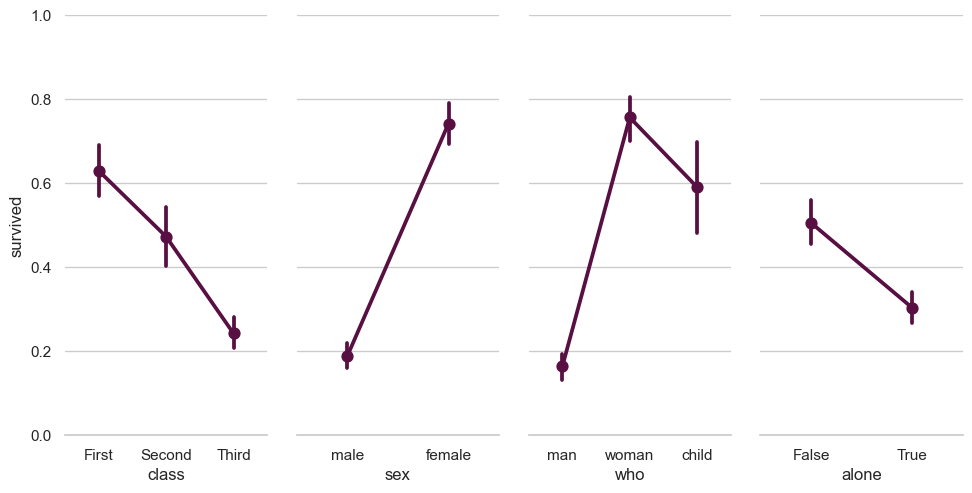

In [92]:
# Set the visual theme to 'whitegrid' 
sns.set_theme(style="whitegrid")

# Load the built-in Titanic dataset
titanic = sns.load_dataset("titanic")

# Display the first 5 rows of the dataset
display(titanic.head())

# Initialize a grid of subplots to visualize survival probability across multiple categorical variables
g = sns.PairGrid(
    titanic,
    y_vars="survived",                        # Dependent variable (survival probability)
    x_vars=["class", "sex", "who", "alone"],  # Categorical factors affecting survival
    height=5,                                 # Height of each subplot for better readability
    aspect=0.5                                # Aspect ratio (width-to-height) for balanced visualization
)

# Plot survival probability trends using a point plot
g.map(sns.pointplot, color="xkcd:plum")  # Use XKCD's "plum" color for differentiation

# Set the y-axis limits to represent survival probability from 0 to 1
g.set(ylim=(0, 1))

# Remove the left spine from the plot for a cleaner aesthetic
sns.despine(fig=g.fig, left=True)

### Dot plot with several variables (PairGrid)

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

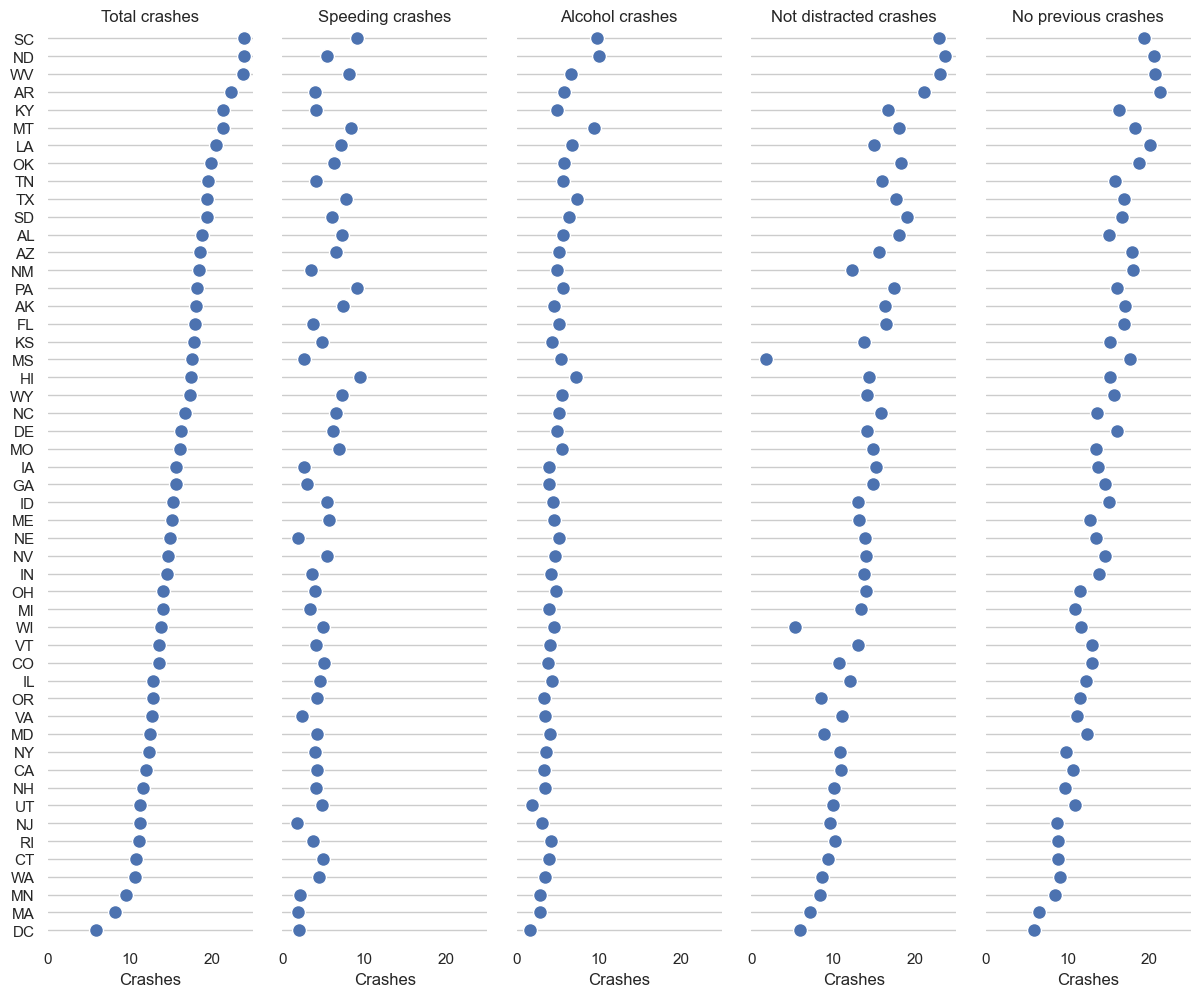

In [94]:
# Set the visual theme to 'whitegrid'
sns.set_theme(style="whitegrid")

# Load the built-in 'car_crashes' dataset
crashes = sns.load_dataset("car_crashes")

# Display the first 5 rows of the dataset
display(crashes.head())

# Initialize a PairGrid for comparing crash statistics across states
g = sns.PairGrid(
    crashes.sort_values("total", ascending=False),  # Sort states by total crashes in descending order
    x_vars=crashes.columns[:-3],  # Select crash-related numerical columns (excluding last 3 non-relevant ones)
    y_vars=["abbrev"],  # Use state abbreviations as y-axis labels
    height=10,  # Set height of each subplot for better visibility
    aspect=0.25  # Adjust aspect ratio for a compact horizontal layout
)

# Plot each column as a horizontal dot plot using stripplot
g.map(
    sns.stripplot,
    size=10,           # Set dot size for better visibility
    orient="h",        # Make dots horizontal to match the grid layout
    jitter=False,      # Disable jitter to keep dots aligned
    palette="flare_r", # Use reversed "flare" color palette for a visually appealing gradient
    linewidth=1,       # Add thin outline around dots for clarity
    edgecolor="w"      # Use white edges to separate overlapping dots
)

# Standardize x-axis limits across all plots and set axis labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Define descriptive titles for each crash type column
titles = [
    "Total crashes", 
    "Speeding crashes", 
    "Alcohol crashes",
    "Not distracted crashes", 
    "No previous crashes"
]

# Apply the custom titles to each subplot
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)  # Assign a unique title to each column

    # Improve readability by adjusting grid lines
    ax.xaxis.grid(False)  # Hide vertical grid lines
    ax.yaxis.grid(True)   # Show horizontal grid lines for alignment

# Remove left and bottom spines for a cleaner design
sns.despine(left=True, bottom=True)

### Scatterplot Matrix (pairplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

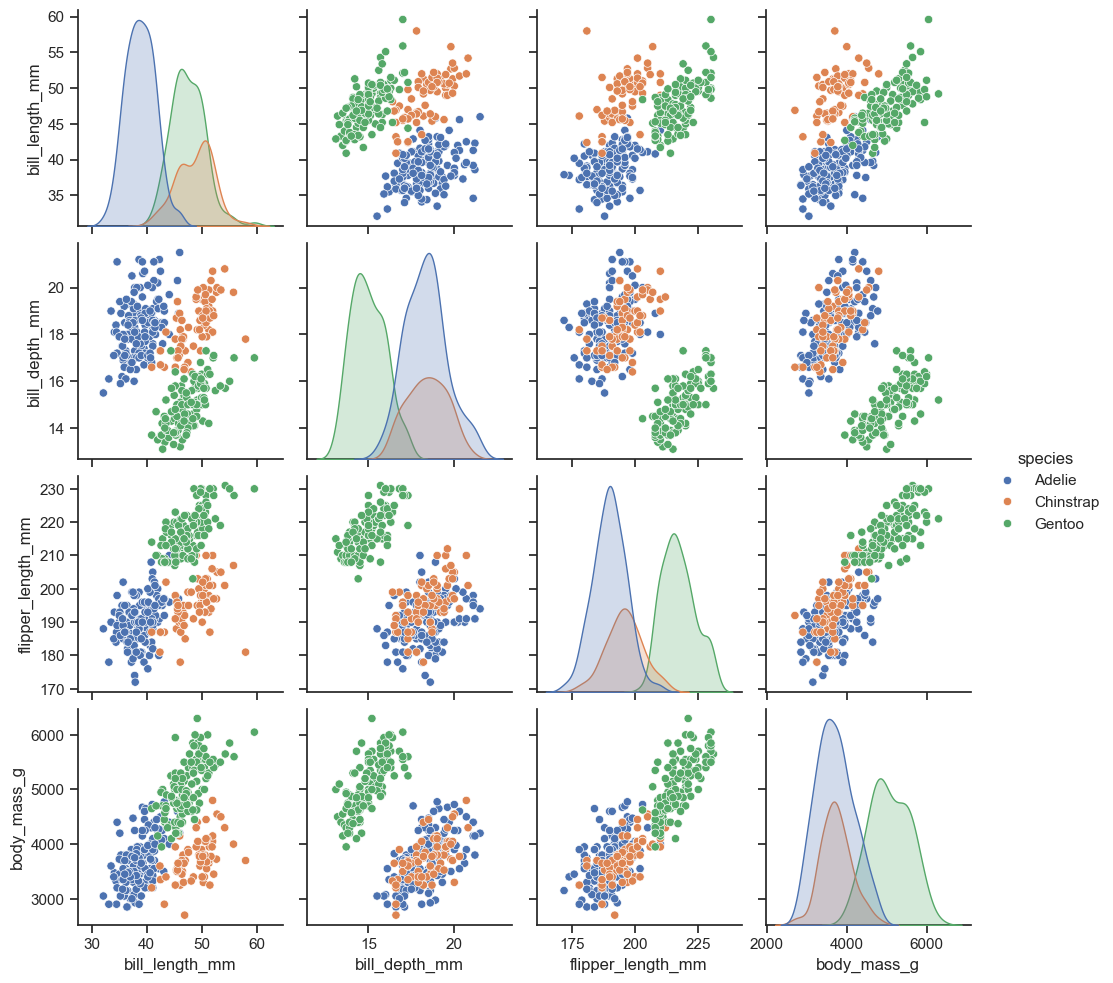

In [96]:
# Set the visual theme to 'ticks'
sns.set_theme(style="ticks")

# Load the built-in 'penguins' dataset
df = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(df.head())

# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(
    df,            # Dataset containing penguin measurements
    hue="species"  # Color the points by species to differentiate groups
)


### Joint and marginal histograms (JointGrid)

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

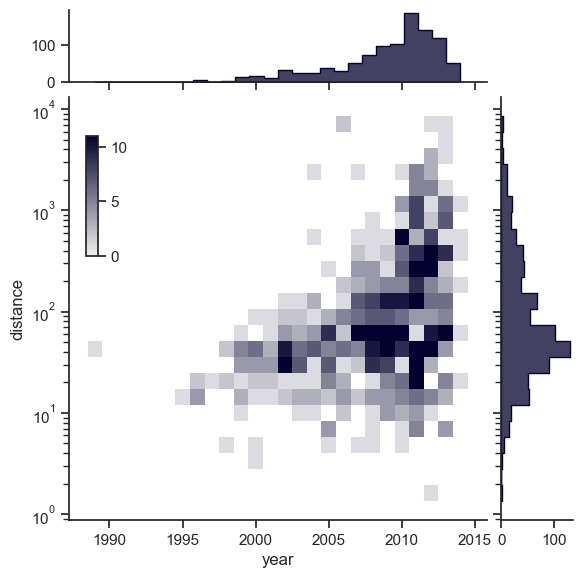

In [98]:
# Set 'ticks' style for a clean and minimal style
sns.set_theme(style="ticks") 

# Load the built-in 'planets' dataset 
planets = sns.load_dataset("planets")

# Display the first 5 rows of the dataset
display(planets.head())

# Initialize a JointGrid to plot relationship between 'year' and 'distance'
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set the y-axis to logarithmic scale to better visualize a wide range of distances
g.ax_joint.set(yscale="log")

# Add an inset axis specifically for the histogram colorbar (legend)
cax = g.figure.add_axes([.15, .55, .02, .2])

# Plot a joint histogram on the grid to visualize density of observations
g.plot_joint(
    sns.histplot,
    discrete=(True, False),       # Treat 'year' as discrete, 'distance' as continuous
    cmap="light:#03012d",         # Gradient color map from light to dark navy
    pmax=0.8,                     # Set maximum percentile cutoff for color intensity
    cbar=True,                    # Display colorbar to indicate data density
    cbar_ax=cax                   # Place colorbar in the custom inset axis
)

# Add marginal histograms (along axes) to summarize individual distributions
g.plot_marginals(
    sns.histplot,
    element="step",               # Use step lines instead of bars for clarity
    color="#03012d"               # Set line color to dark navy for consistency
)

### Smooth kernel density with marginal histograms (JointGrid)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

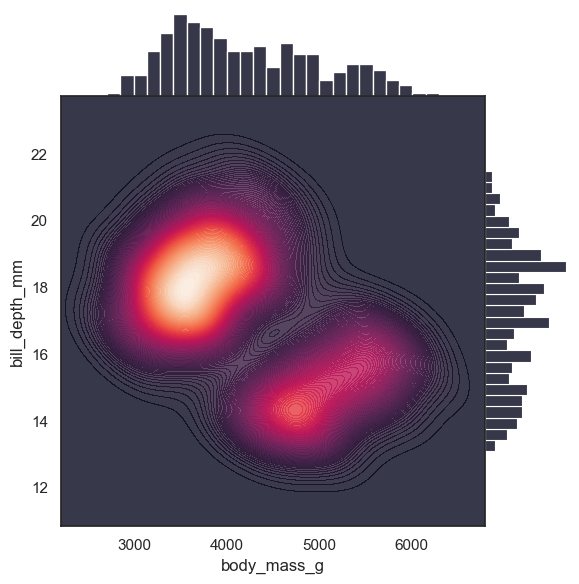

In [100]:
# Set the visual theme to 'white'
sns.set_theme(style="white")

# Load the example 'penguins' dataset
df = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(df.head())

# Create a JointGrid to visualize the relationship between 'body_mass_g' and 'bill_depth_mm'
# The 'space=0' ensures that there is no space between the joint plot and marginal plots
g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)

# Plot the joint distribution using kernel density estimation (KDE)
g.plot_joint(sns.kdeplot,
             fill=True,                             # Fill the KDE plot
             clip=((2200, 6800), (10, 25)),         # Set limits for body mass and bill depth
             thresh=0,                              # Set the threshold for plotting
             levels=100,                            # Use 100 contour levels for the KDE plot
             cmap="rocket", alpha=0.8)              # Use the 'rocket' color palette for the contours

# Plot the marginal histograms for both x and y variables
g.plot_marginals(sns.histplot, 
                 color="#03051A",                  # Dark color for the marginal histograms
                 alpha=0.8,                        # Fully opaque histograms
                 bins=25)                          # Set the number of bins for the histograms

### Scatterplot with marginal ticks (JointGrid)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

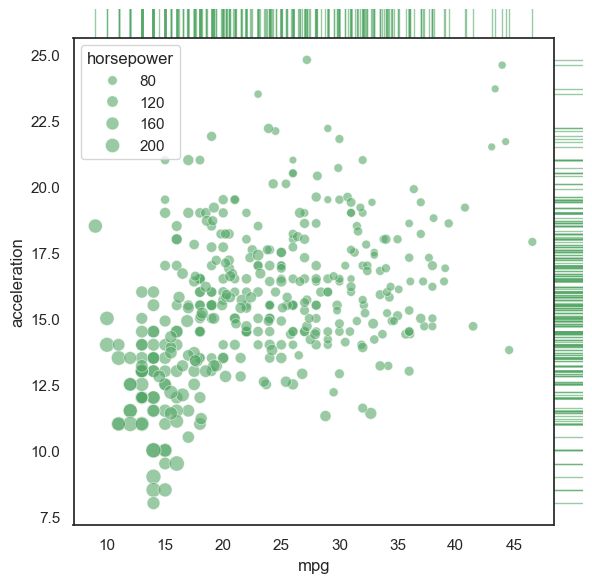

In [102]:
# Set the visual theme to 'white' with color codes enabled (enables shorthand like 'g' for green)
sns.set_theme(style="white", color_codes=True)

# Load the example 'mpg' dataset
mpg = sns.load_dataset("mpg")

# Display the first 5 rows of the dataset
display(mpg.head())

# Initialize a JointGrid layout
g = sns.JointGrid(
    data=mpg,
    x="mpg",                        # X-axis: miles per gallon
    y="acceleration",              # Y-axis: acceleration (0–60 mph in seconds)
    space=0,                       # No space between joint and marginal plots
    ratio=17                       # Makes the joint plot much larger than marginals
)

# Draw the central joint plot using a scatterplot
g.plot_joint(
    sns.scatterplot,
    size=mpg["horsepower"],        # Size of dots based on horsepower
    sizes=(30, 120),               # Map horsepower range to visual size
    color="g",                     # Green dots
    alpha=0.6,                     # Slight transparency for overlapping points
    legend=True                   # Omit size legend for cleaner look
)

# Add rug plots to show individual data distribution on each axis
g.plot_marginals(
    sns.rugplot,
    height=10,                      # Height of the marginal rugs
    color="g",                     # Green to match scatterplot
    alpha=0.6                      # Transparency for subtlety
)


### Hexbin plot with marginal distributions (jointplot)

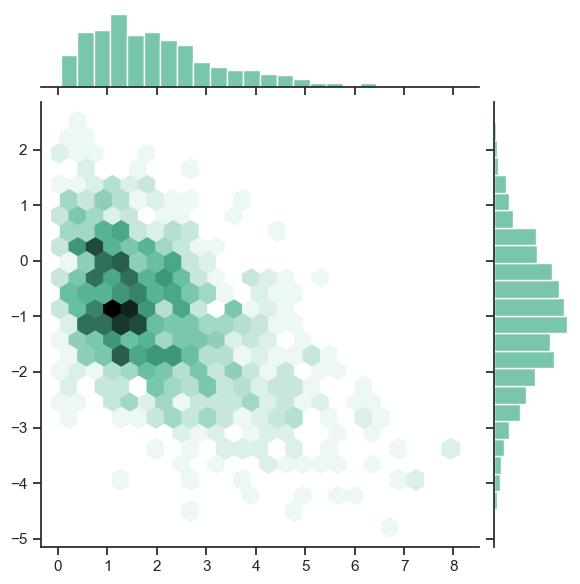

In [104]:
# Set 'ticks' style for a clean and minimal style
sns.set_theme(style="ticks")

# Generate synthetic data
rs = np.random.RandomState(11)   # Set random seed for reproducibility

x = rs.gamma(2, size=1000)       # Generate 1000 samples from a Gamma distribution
y = -0.5 * x + rs.normal(size=1000)  # Generate y as a linear function of x with added noise

# Create a jointplot using hex bins (2D histogram with hexagonal tiles)
g = sns.jointplot(
    x=x, y=y,                    # Variables to plot
    kind="hex",                  # Use hexbin plot for dense scatter visualization
    color="#4CB391"              # Set the color of the hex tiles (a calming green)
)

### Joint kernel density estimate (jointplot)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

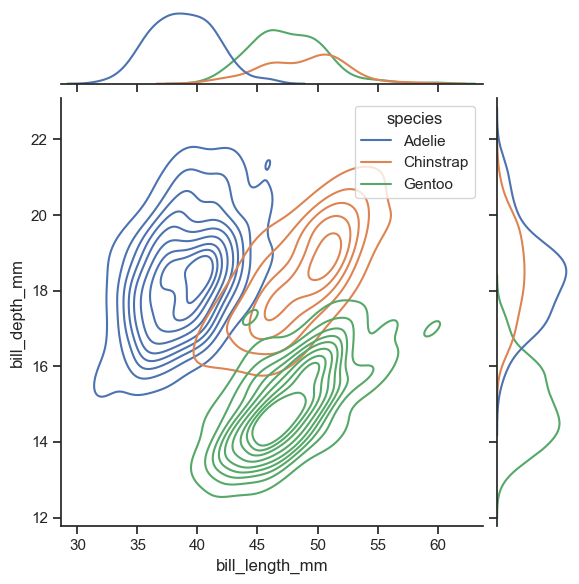

In [106]:
# Set 'ticks' style for a clean and minimal style
sns.set_theme(style="ticks")

# Load the built-in 'penguins' dataset 
penguins = sns.load_dataset("penguins")

# Display the first 5 rows of the dataset
display(penguins.head())

# Create a joint plot showing the relationship between bill length and depth
# using kernel density estimation (KDE) to visualize distribution density
g = sns.jointplot(
    data=penguins,                  # Dataset containing penguin measurements
    x="bill_length_mm",             # Bill length in millimeters on x-axis
    y="bill_depth_mm",              # Bill depth in millimeters on y-axis
    hue="species",                  # Color the KDE by penguin species
    kind="kde"                     # Plot type set to Kernel Density Estimation
)

### Linear regression with marginal distributions (jointplot)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

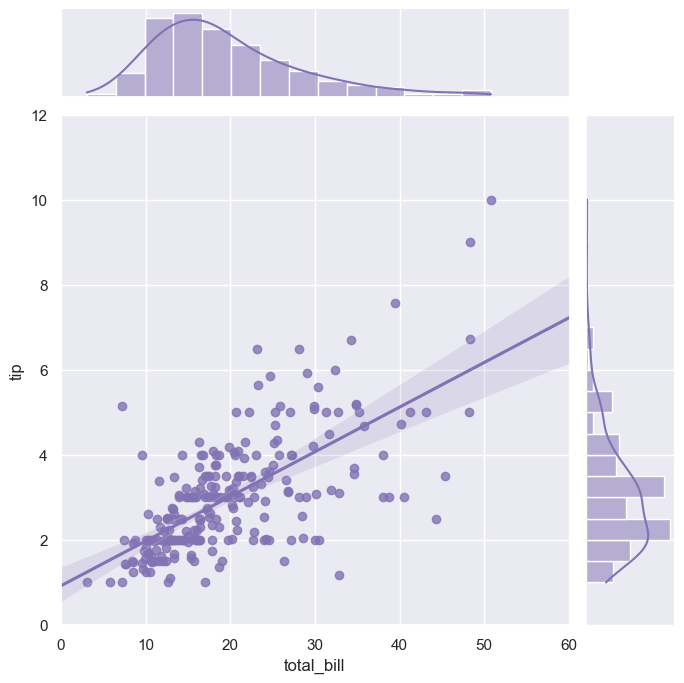

In [108]:
# Set the theme to 'darkgrid'
sns.set_theme(style="darkgrid")

# Load the built-in 'tips' dataset
tips = sns.load_dataset("tips")

# Display the first 5 rows of the dataset
display(tips.head())

# Create a joint plot to visualize the relationship between total bill and tip amount
g = sns.jointplot(
    data=tips,        # Dataset being used
    x="total_bill",   # X-axis represents the total bill amount
    y="tip",          # Y-axis represents the tip amount
    kind="reg",       # Regression plot to show the trend line
    truncate=False,   # Ensure the regression line extends fully across the data range
    xlim=(0, 60),     # Set the x-axis limit to focus on relevant data points
    ylim=(0, 12),     # Set the y-axis limit to filter out extreme values
    color="m",        # Use magenta ('m') as the color for the regression line and scatter points
    height=7          # Set the size of the figure
)

# API overview

## Objects interface
_____
### Plot object
`Plot` An interface for declaratively specifying statistical graphics.
_____
### Mark objects
**Dot marks**

`Dot` A mark suitable for dot plots or less-dense scatterplots.

`Dots` A dot mark defined by strokes to better handle overplotting.

**Line marks**

`Line` A mark connecting data points with sorting along the orientation axis.

`Lines` A faster but less-flexible mark for drawing many lines.

`Path` A mark connecting data points in the order they appear.

`Paths` A faster but less-flexible mark for drawing many paths.

`Dash` A line mark drawn as an oriented segment for each datapoint.

`Range` An oriented line mark drawn between min/max values.

**Bar marks**

`Bar` A bar mark drawn between baseline and data values.

`Bars` A faster bar mark with defaults more suitable for histograms.

**Fill marks**

`Area` A fill mark drawn from a baseline to data values.

`Band` A fill mark representing an interval between values.

**Text marks**

`Text` A textual mark to annotate or represent data values.
_____
### Stat objects
`Agg` Aggregate data along the value axis using given method.

`Est` Calculate a point estimate and error bar interval.

`Count` Count distinct observations within groups.

`Hist` Bin observations, count them, and optionally normalize or cumulate.

`KDE` Compute a univariate kernel density estimate.

`Perc` Replace observations with percentile values.

`PolyFit` Fit a polynomial of the given order and resample data onto predicted curve.
_____
### Move objects
`Dodge` Displacement and narrowing of overlapping marks along orientation axis.

`Jitter` Random displacement along one or both axes to reduce overplotting.

`Norm` Divisive scaling on the value axis after aggregating within groups.

`Stack` Displacement of overlapping bar or area marks along the value axis.

`Shift` Displacement of all marks with the same magnitude / direction.
_____
### Scale objects
`Boolean` A scale with a discrete domain of True and False values.

`Continuous` A numeric scale supporting norms and functional transforms.

`Nominal` A categorical scale without relative importance / magnitude.

`Temporal` A scale for date/time data.
_____
### Base classes
`Mark` Base class for objects that visually represent data.

`Stat` Base class for objects that apply statistical transformations.

`Move` Base class for objects that apply simple positional transforms.

`Scale` Base class for objects that map data values to visual properties.
_____
## Function interface
_____
### Relational plots
`relplot` Figure-level interface for drawing relational plots onto a FacetGrid.

`scatterplot` Draw a scatter plot with possibility of several semantic groupings.

`lineplot` Draw a line plot with possibility of several semantic groupings.
_____
### Distribution plots
`displot` Figure-level interface for drawing distribution plots onto a FacetGrid.

`histplot` Plot univariate or bivariate histograms to show distributions of datasets.

`kdeplot` Plot univariate or bivariate distributions using kernel density estimation.

`ecdfplot` Plot empirical cumulative distribution functions.

`rugplot` Plot marginal distributions by drawing ticks along the x and y axes.
_____
### Categorical plots
`catplot` Figure-level interface for drawing categorical plots onto a FacetGrid.

`stripplot` Draw a categorical scatterplot using jitter to reduce overplotting.

`swarmplot` Draw a categorical scatterplot with points adjusted to be non-overlapping.

`boxplot` Draw a box plot to show distributions with respect to categories.

`violinplot` Draw a patch representing a KDE and add observations or box plot statistics.

`boxenplot` Draw an enhanced box plot for larger datasets.

`pointplot` Show point estimates and errors using lines with markers.

`barplot` Show point estimates and errors as rectangular bars.

`countplot` Show the counts of observations in each categorical bin using bars.
_____
### Regression plots
`lmplot` Plot data and regression model fits across a FacetGrid.

`regplot` Plot data and a linear regression model fit.

`residplot` Plot the residuals of a linear regression.
_____
### Matrix plots
`heatmap` Plot rectangular data as a color-encoded matrix.

`clustermap` Plot a matrix dataset as a hierarchically-clustered heatmap.
_____
## Multi-plot grids
_____
### Facet grids
`FacetGrid` Multi-plot grid for plotting conditional relationships.
_____
### Pair grids
`pairplot` Plot pairwise relationships in a dataset.

`PairGrid` Subplot grid for plotting pairwise relationships in a dataset.
_____
### Joint grids
`jointplot` Draw a plot of two variables with bivariate and univariate graphs.

`JointGrid` Grid for drawing a bivariate plot with marginal univariate plots.
_____
## Themeing
`set_theme` Set aspects of the visual theme for all matplotlib and seaborn plots.

`axes_style` Get the parameters that control the general style of the plots.

`set_style` Set the parameters that control the general style of the plots.

`plotting_context` Get the parameters that control the scaling of plot elements.

`set_context` Set the parameters that control the scaling of plot elements.

`set_color_codes` Change how matplotlib color shorthands are interpreted.

`reset_defaults` Restore all RC params to default settings.

`reset_orig` Restore all RC params to original settings (respects custom rc).

`set` Alias for set_theme(), which is the preferred interface.
_____
## Color palettes
`set_palette` Set the matplotlib color cycle using a seaborn palette.

`color_palette` Return a list of colors or continuous colormap defining a palette.

`husl_palette` Return hues with constant lightness and saturation in the HUSL system.

`hls_palette` Return hues with constant lightness and saturation in the HLS system.

`cubehelix_palette` Make a sequential palette from the cubehelix system.

`dark_palette` Make a sequential palette that blends from dark to color.

`light_palette` Make a sequential palette that blends from light to color.

`diverging_palette` Make a diverging palette between two HUSL colors.

`blend_palette` Make a palette that blends between a list of colors.

`xkcd_palette` Make a palette with color names from the xkcd color survey.

`crayon_palette` Make a palette with color names from Crayola crayons.

`mpl_palette` Return a palette or colormap from the matplotlib registry.
_____
### Palette widgets
`choose_colorbrewer_palette` Select a palette from the ColorBrewer set.

`choose_cubehelix_palette` Launch an interactive widget to create a sequential cubehelix palette.

`choose_light_palette` Launch an interactive widget to create a light sequential palette.

`choose_dark_palette` Launch an interactive widget to create a dark sequential palette.

`choose_diverging_palette` Launch an interactive widget to choose a diverging color palette.
_____
## Utility functions
`despine` Remove the top and right spines from plot(s).

`move_legend` Recreate a plot's legend at a new location.

`saturate` Return a fully saturated color with the same hue.

`desaturate` Decrease the saturation channel of a color by some percent.

`set_hls_values` Independently manipulate the h, l, or s channels of a color.

`load_dataset` Load an example dataset from the online repository (requires internet).

`get_dataset_names` Report available example datasets, useful for reporting issues.

`get_data_home` Return a path to the cache directory for example datasets.